# ANOMALY DETECTION IN TIME SERIES PUMP SENSOR DATA

IMPORTING THE DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from statsmodels.tsa.stattools import adfuller

from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

IMPORTING THE DATASET

In [2]:
pump=pd.read_csv('/Users/suhaniduggal/Documents/code/python/data-csv/sensor.csv')

EXPLORATORY DATA ANALYSIS

In [3]:
pump.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [4]:
pump.tail()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,38.28125,68.28703,52.37268,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,38.28125,66.84028,50.63657,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,39.06250,65.39352,48.90046,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,40.62500,64.23611,47.74306,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,NORMAL
220319,220319,2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,...,41.40625,62.78935,46.29630,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,NORMAL


In [5]:
pump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [6]:
pump.describe()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,110159.500000,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,63601.049991,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,...,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,55079.750000,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,110159.500000,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,165239.250000,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500
max,220319.000000,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


In [7]:
pump.shape

(220320, 55)

The dataset has 220320 rows and 55 columns.

In [8]:
pump.columns

Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

In [9]:
machine_status=pump['machine_status'].value_counts()
print(machine_status)

machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64


Machine Status represents the condition of a machine at a specific point in time.

The Dataset has:
- 205836 instances of NORMAL status,
- 14477 instances of RECOVERING status,
- 7 instances of BROKEN status.

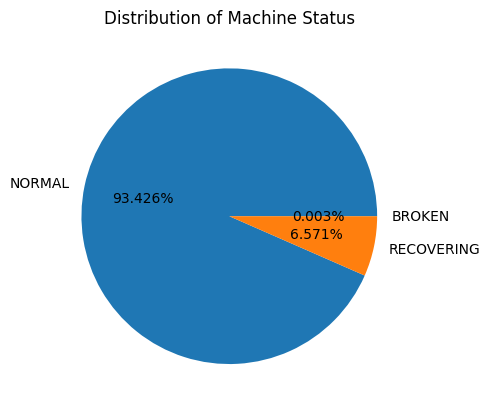

In [10]:
plt.pie(machine_status, labels=machine_status.index, autopct='%1.3f%%')
plt.title('Distribution of Machine Status')
plt.show()

DATA PREPROCESSING

In [11]:
pump.isnull().sum()

Unnamed: 0             0
timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16


Sensor 15 contains all null values and sensor 50 contains nearly half of its value as null. Therefore, we will drop both columns.

The Unnamed: 0 column does not provide any additional information apart from the index so it will also be removed.



In [12]:
pump.drop(['Unnamed: 0','sensor_15','sensor_50'],axis=1,inplace=True)
pump.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,NORMAL


As this is a timeseries dataset, the timestamp column will be set as the index.

In [13]:
pump['timestamp']=pd.to_datetime(pump['timestamp'])
pump.index=pump['timestamp']
pump.drop('timestamp',axis=1,inplace=True)
pump.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,NORMAL


The null values in the dataset will be filled using forward fill.

In [14]:
pump.ffill(inplace=True)

In [15]:
pump.isnull().sum()

sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0
sensor_51         0


The dataset is now free from null values.

VISUALIZATION

Plotting the timestamp where the each sensor in the machine breaks down to visualize potential anomalies.

In [16]:
broken= pump[pump['machine_status']=='BROKEN']
sensors=pump.drop('machine_status',axis=1)
status=pump['machine_status']

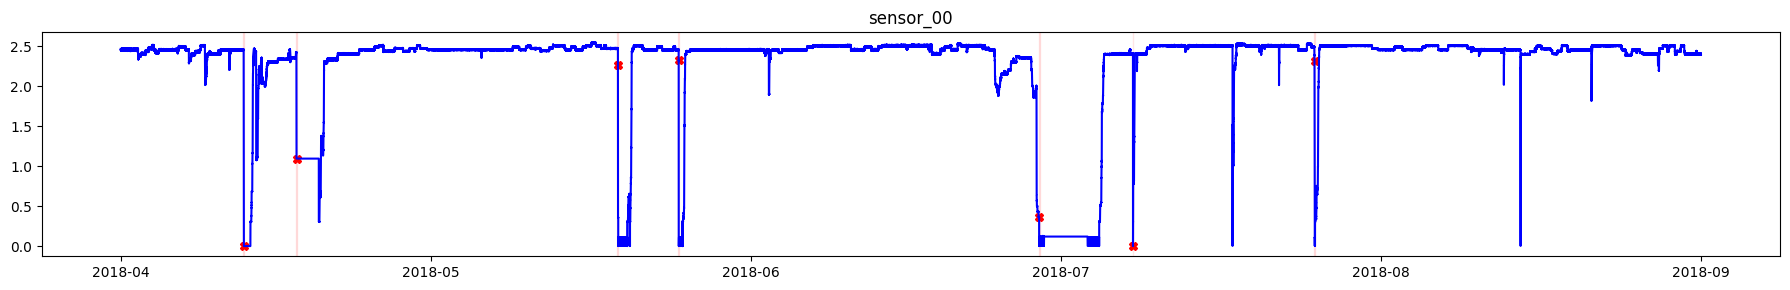

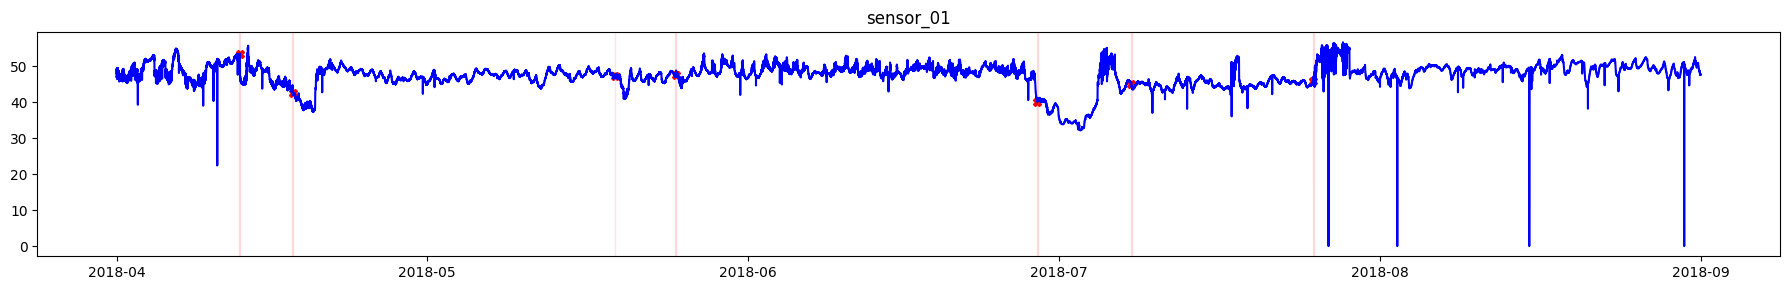

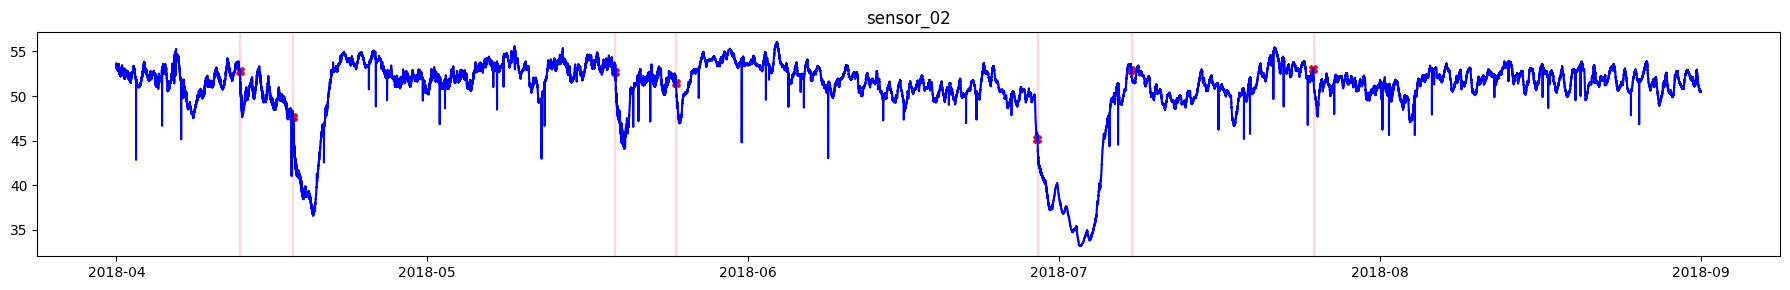

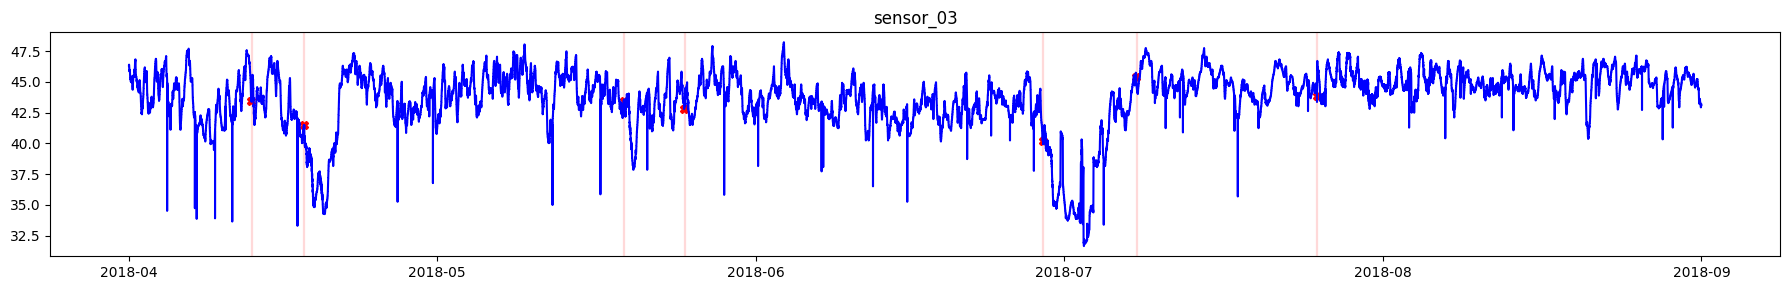

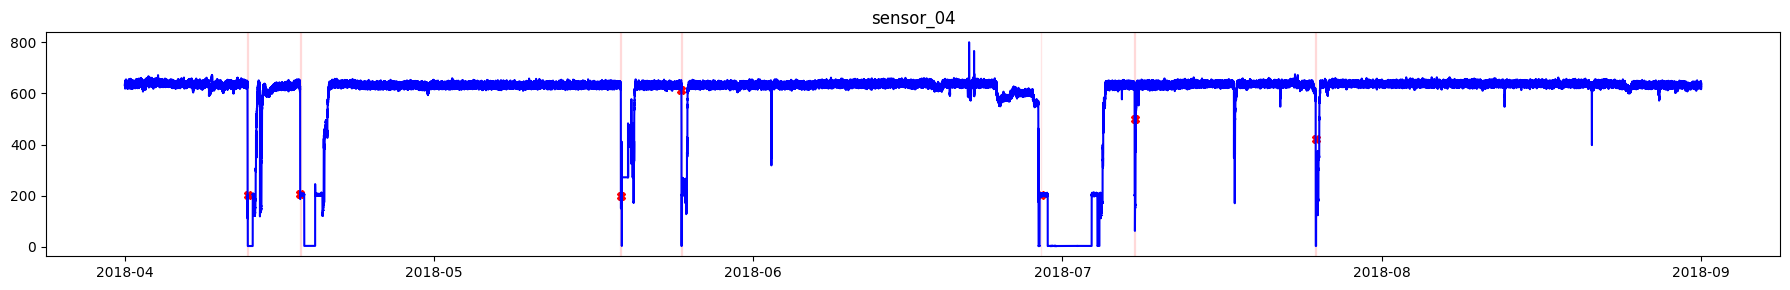

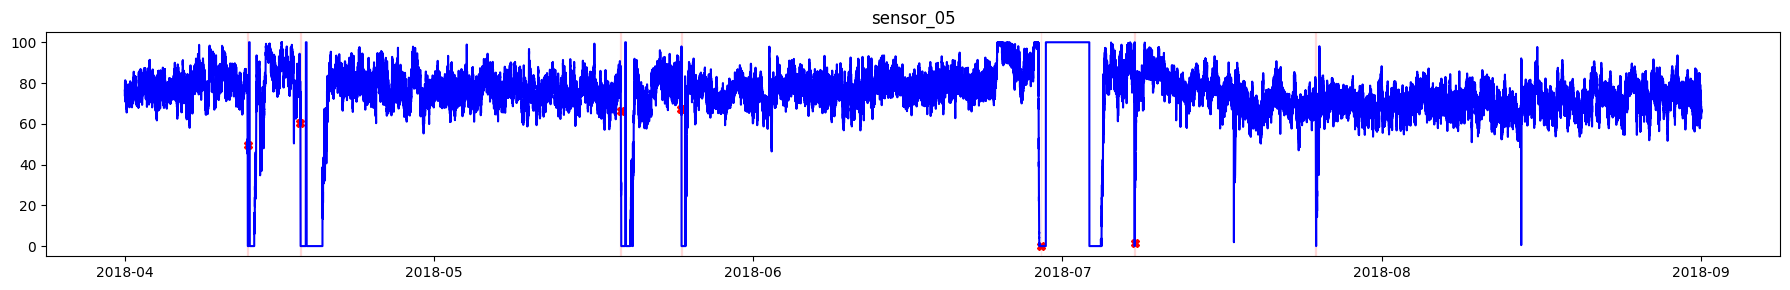

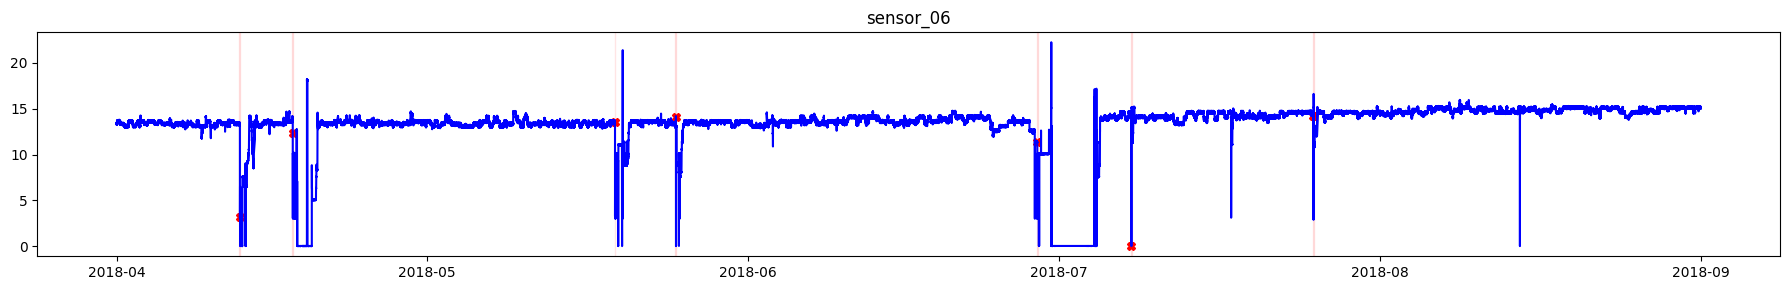

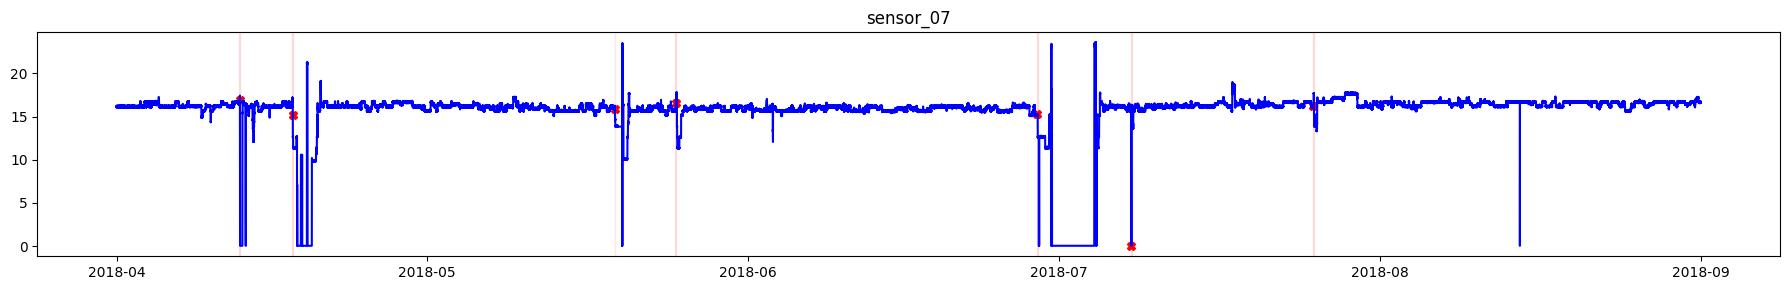

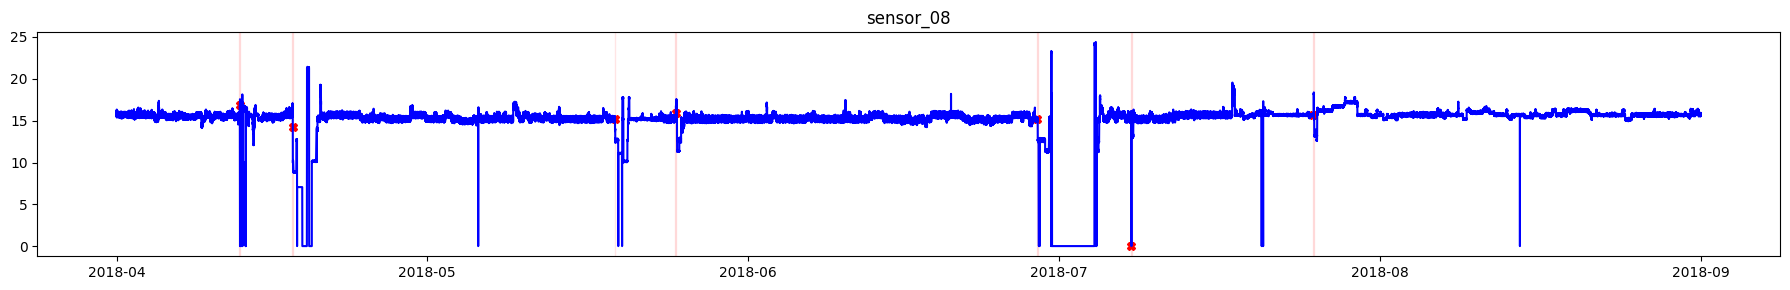

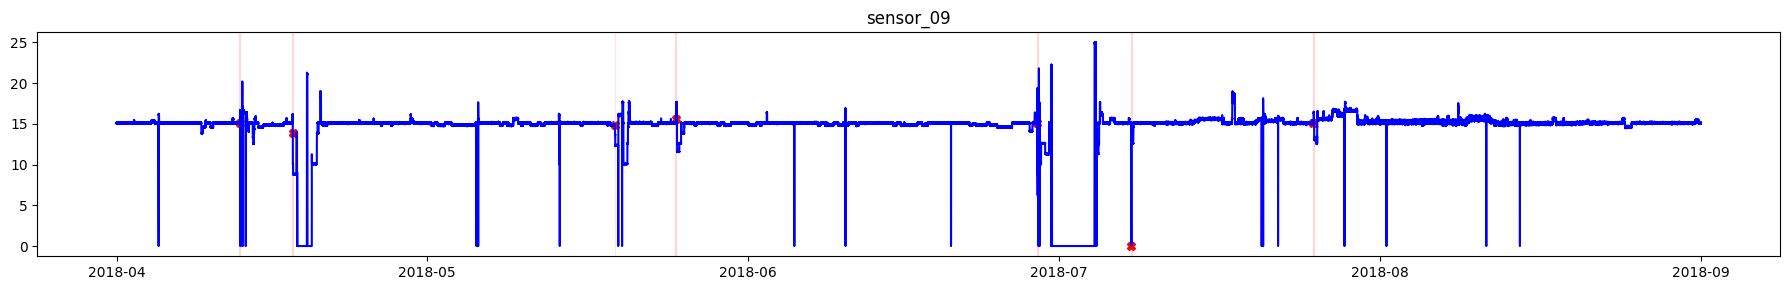

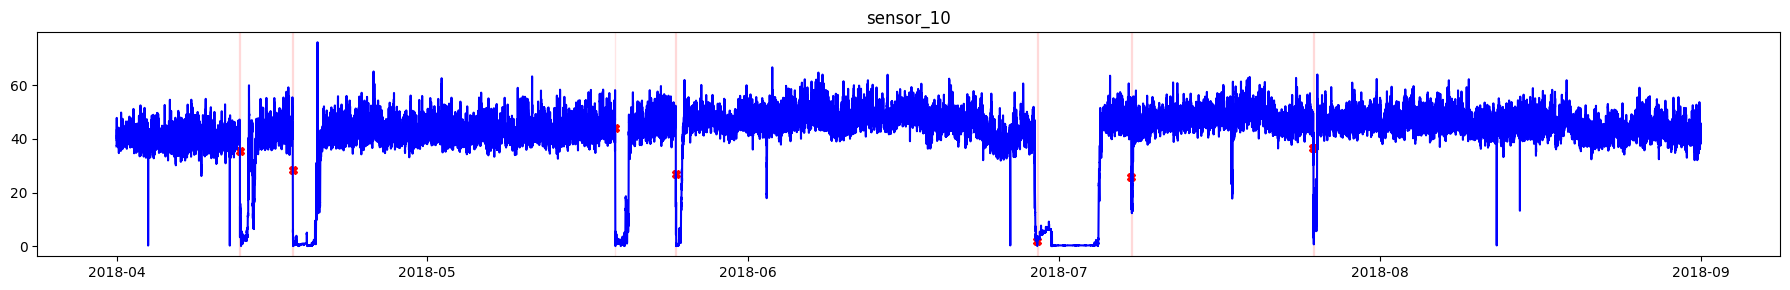

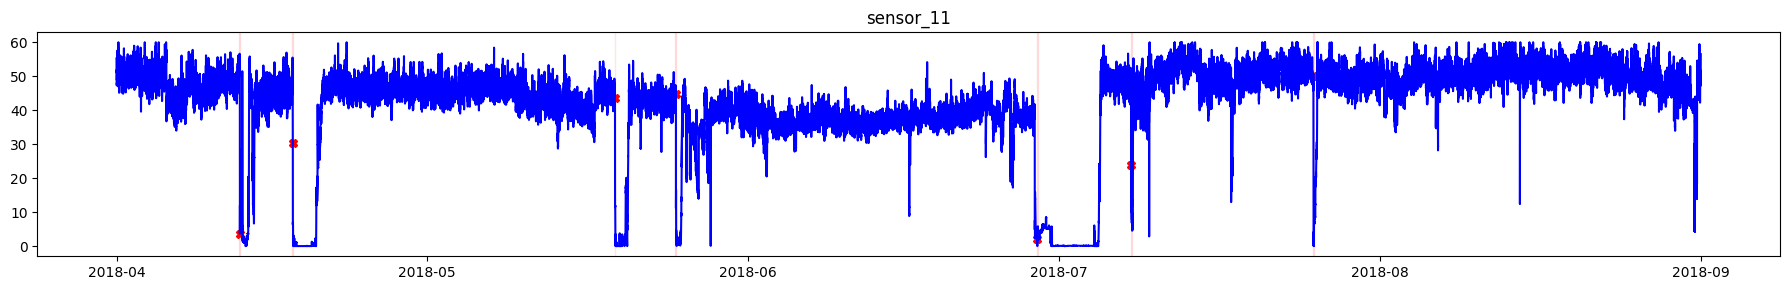

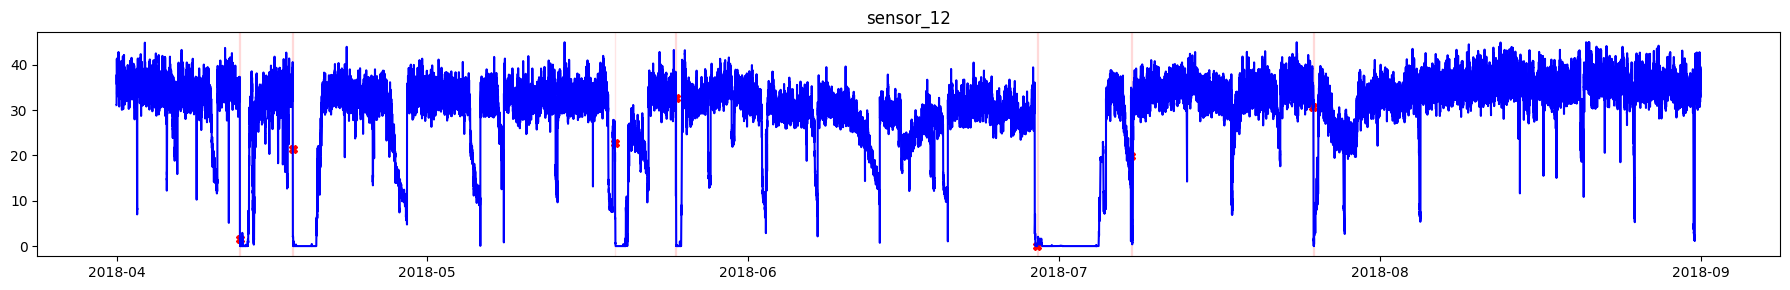

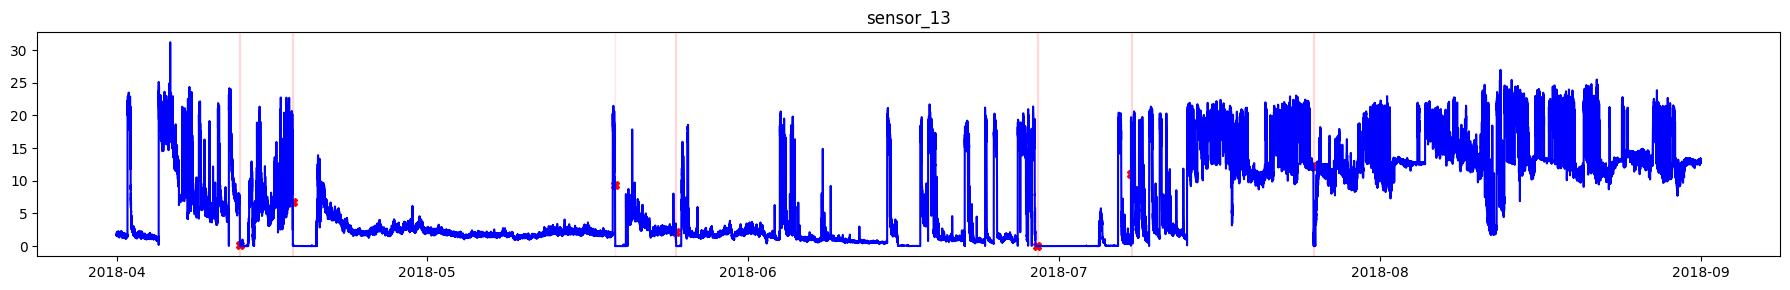

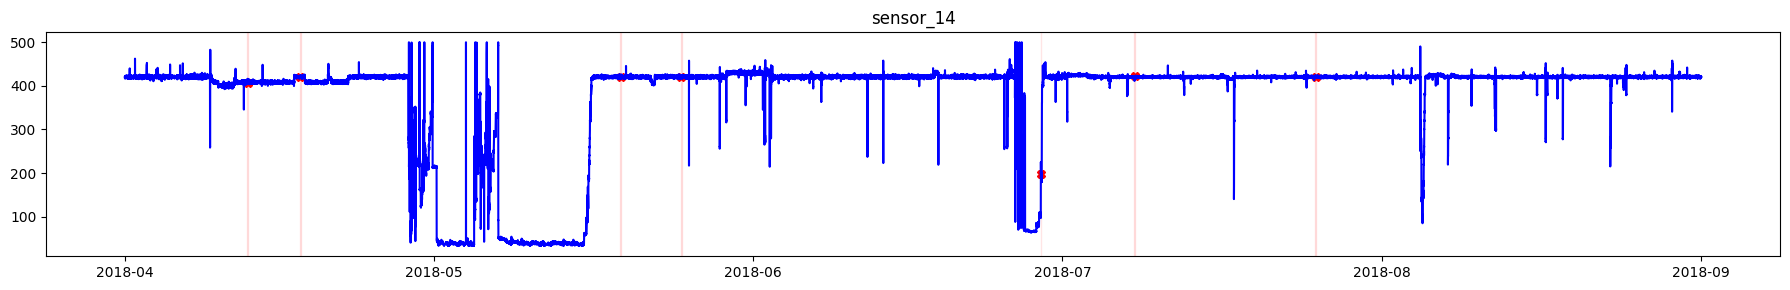

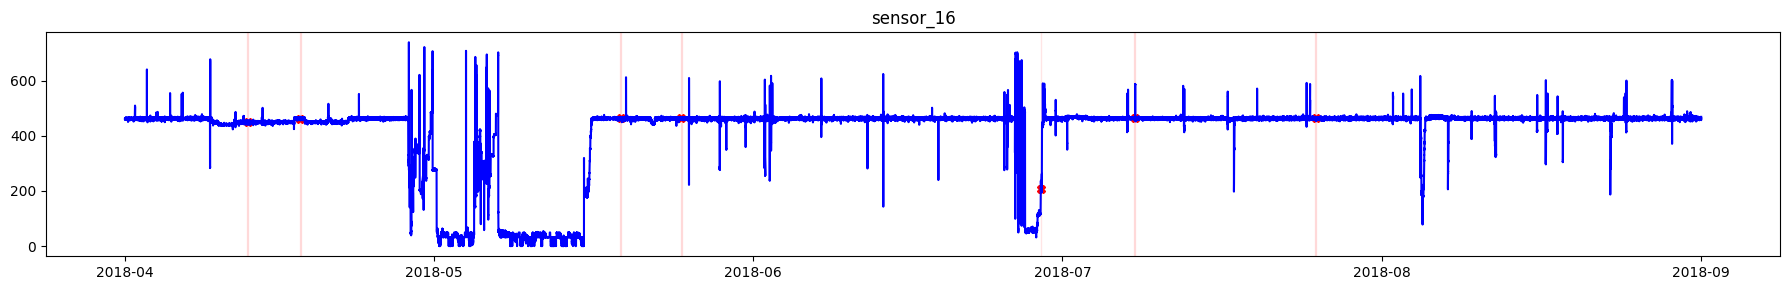

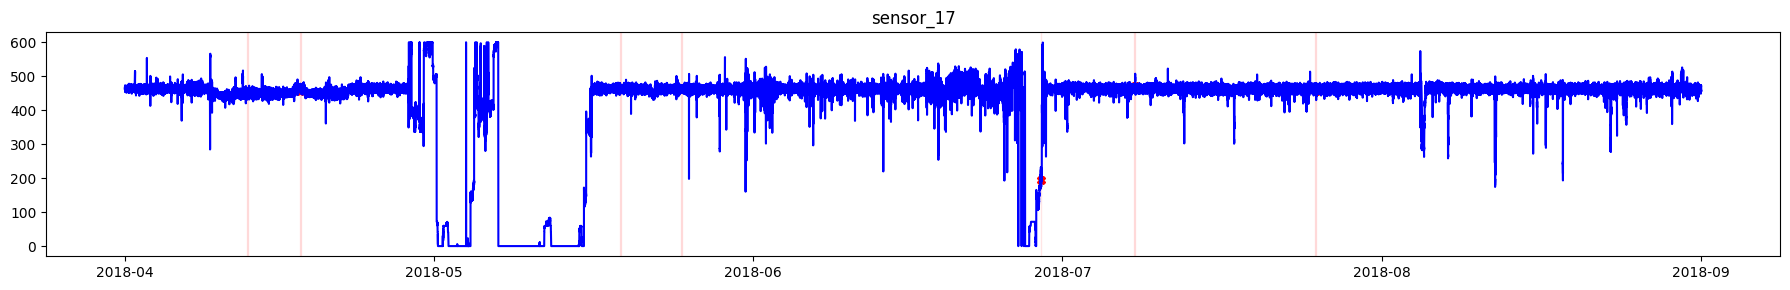

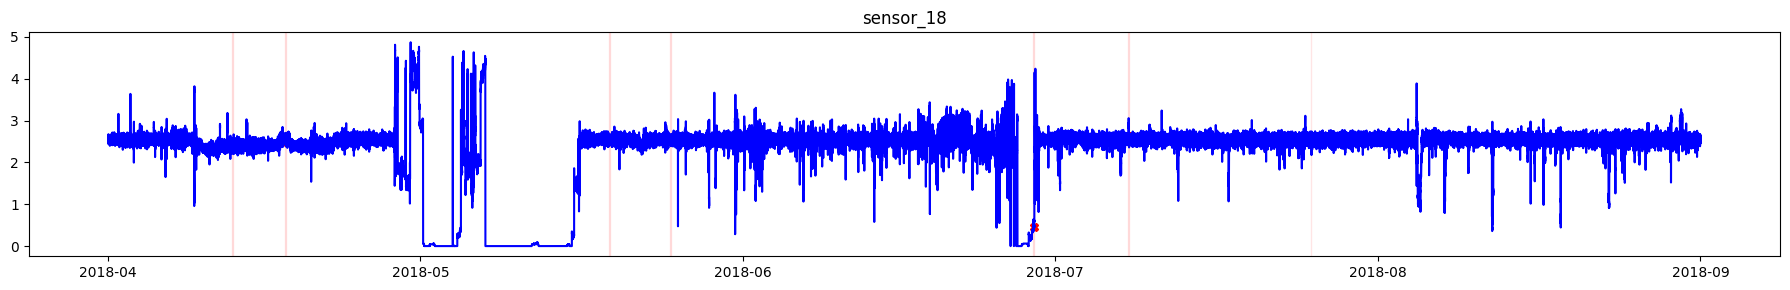

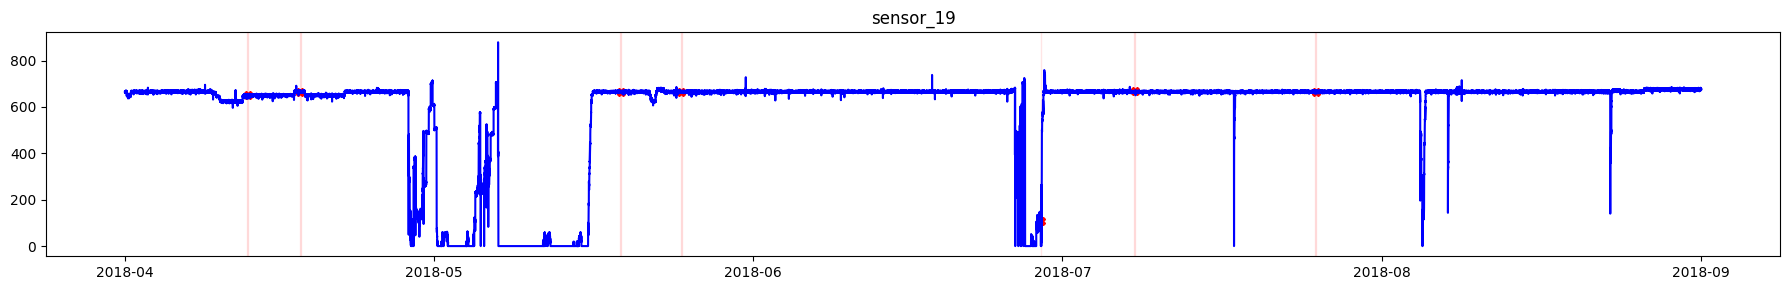

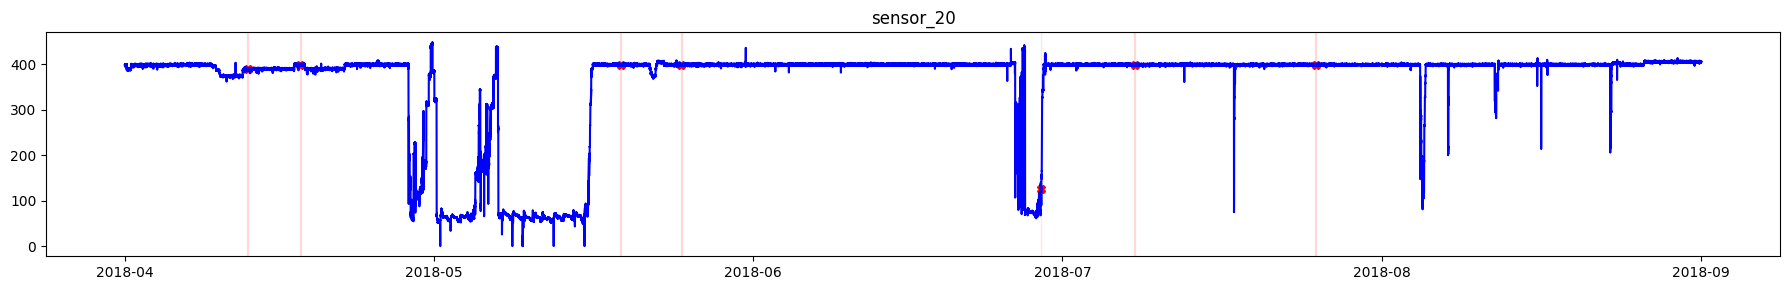

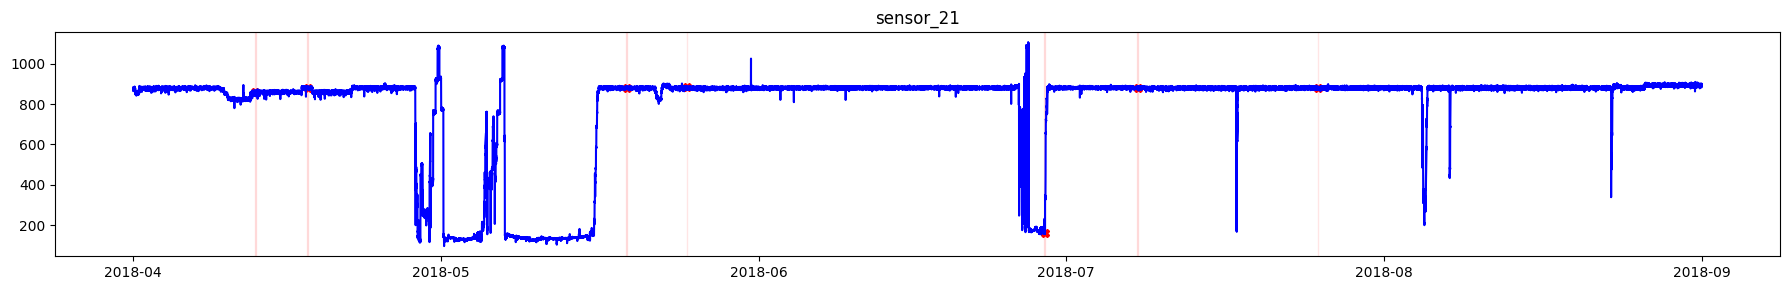

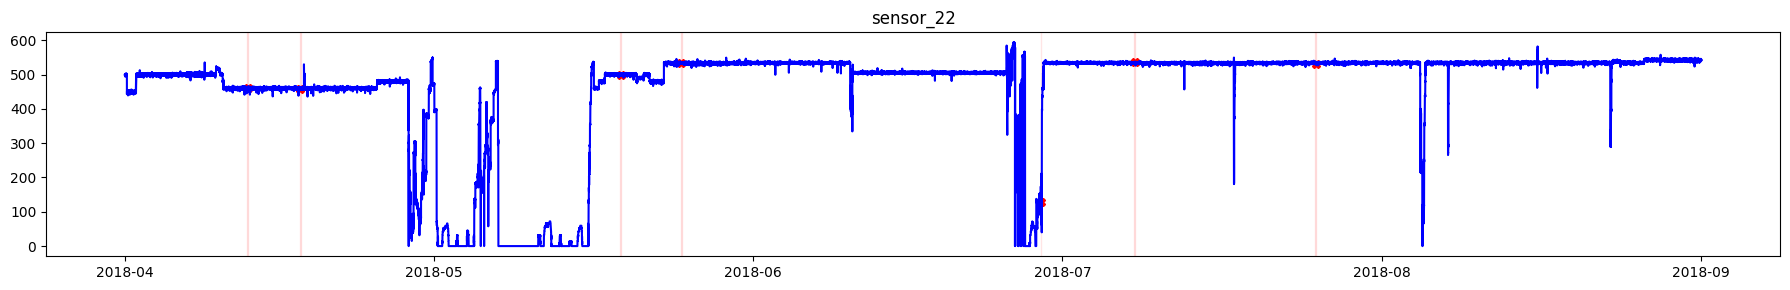

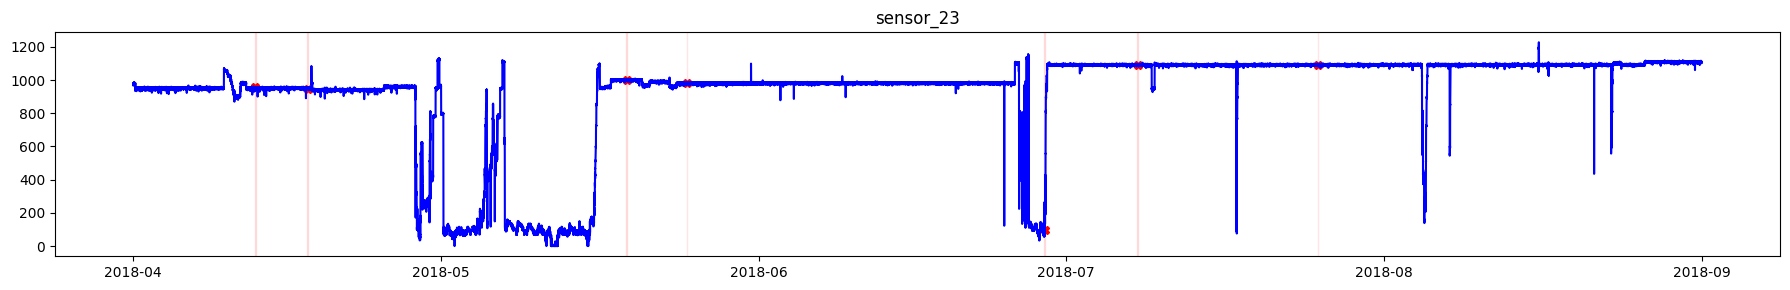

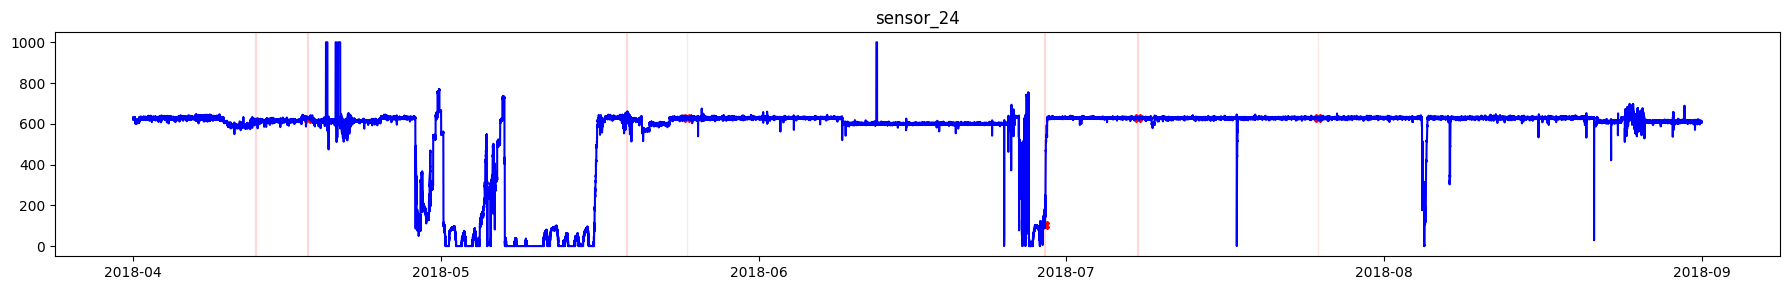

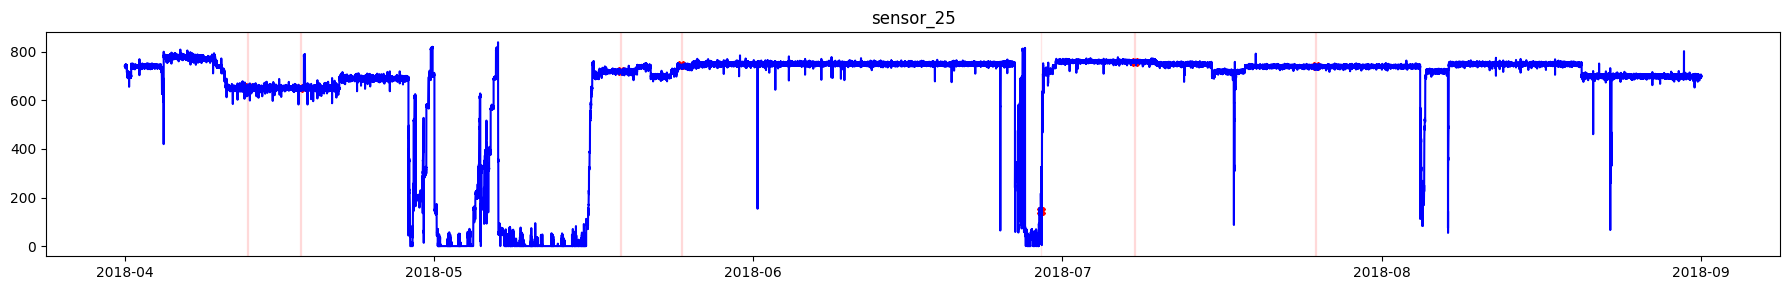

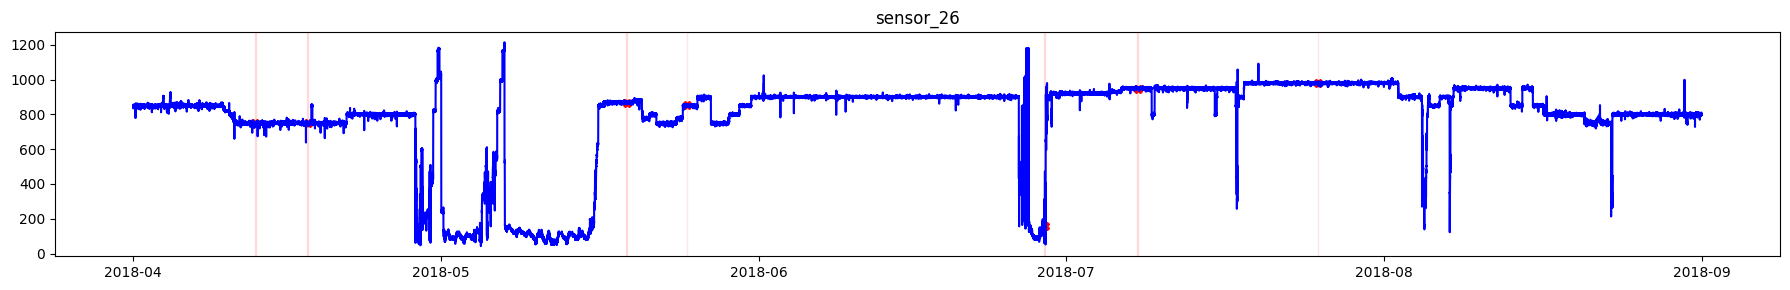

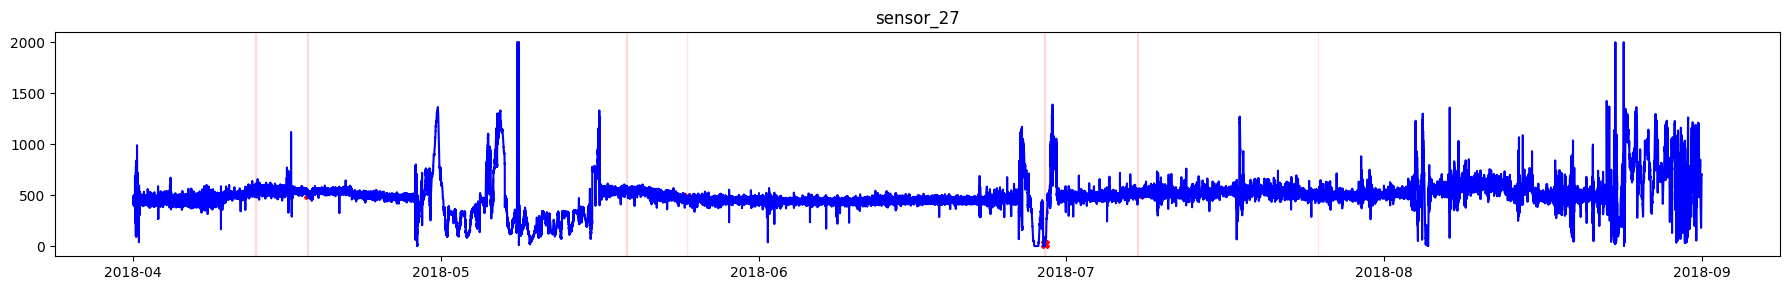

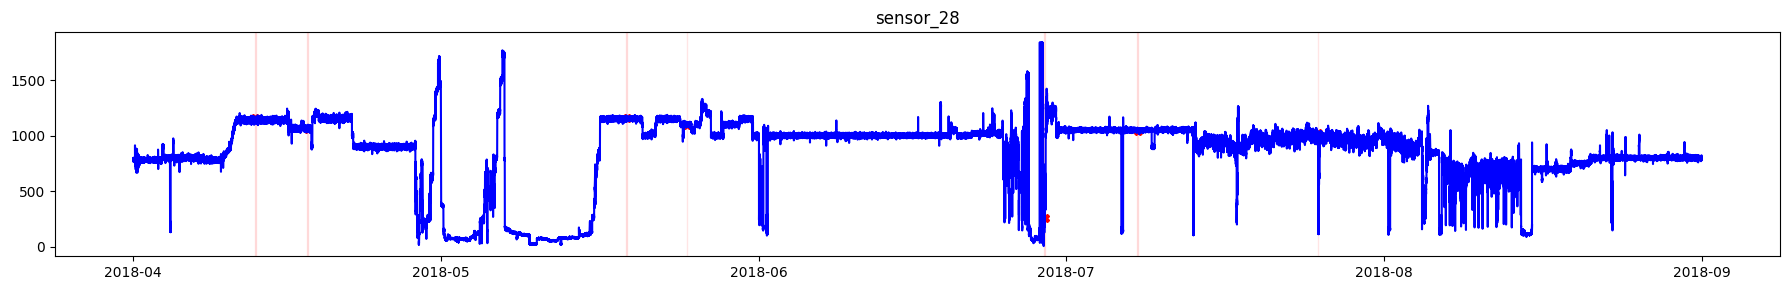

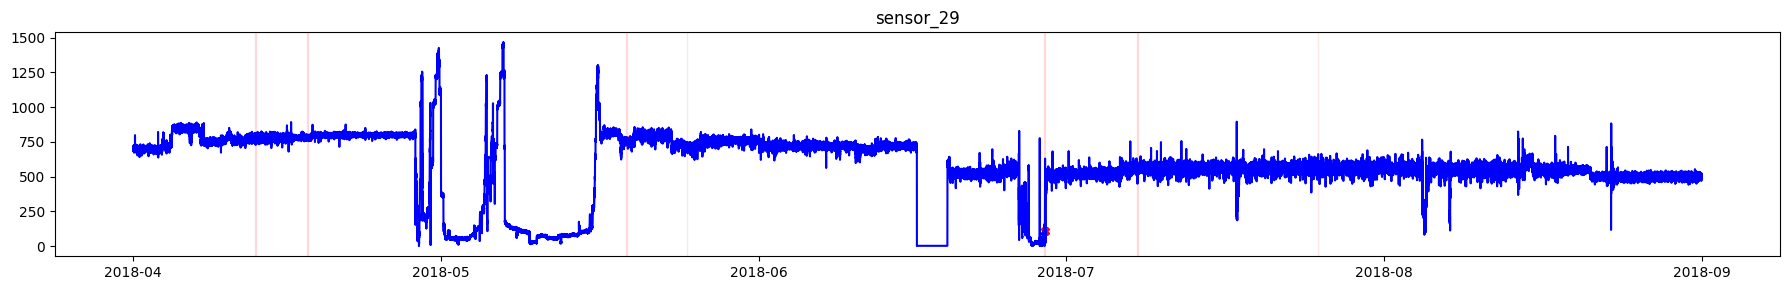

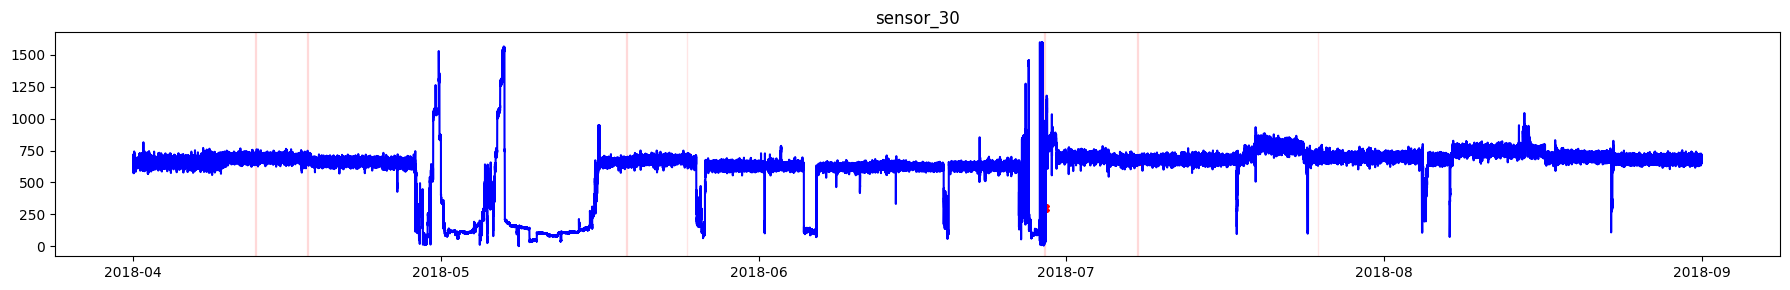

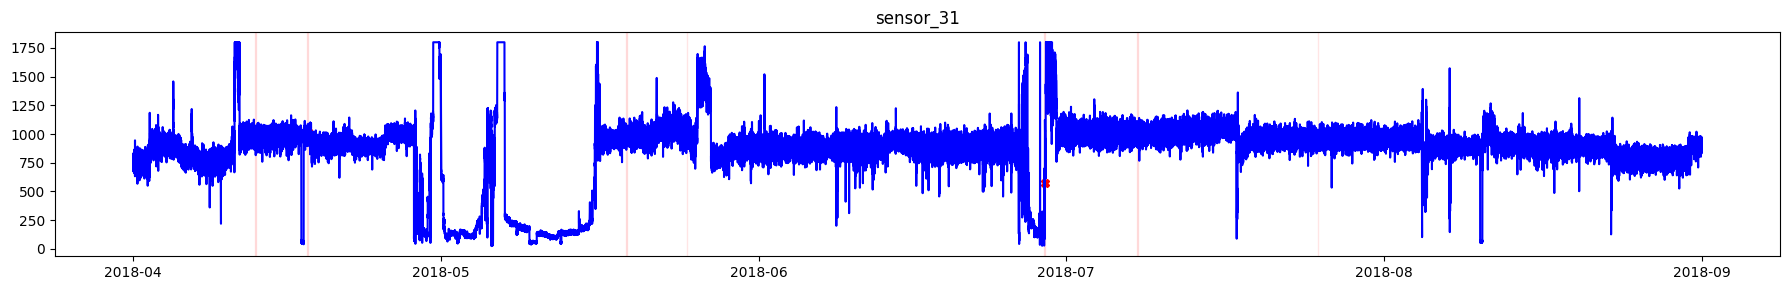

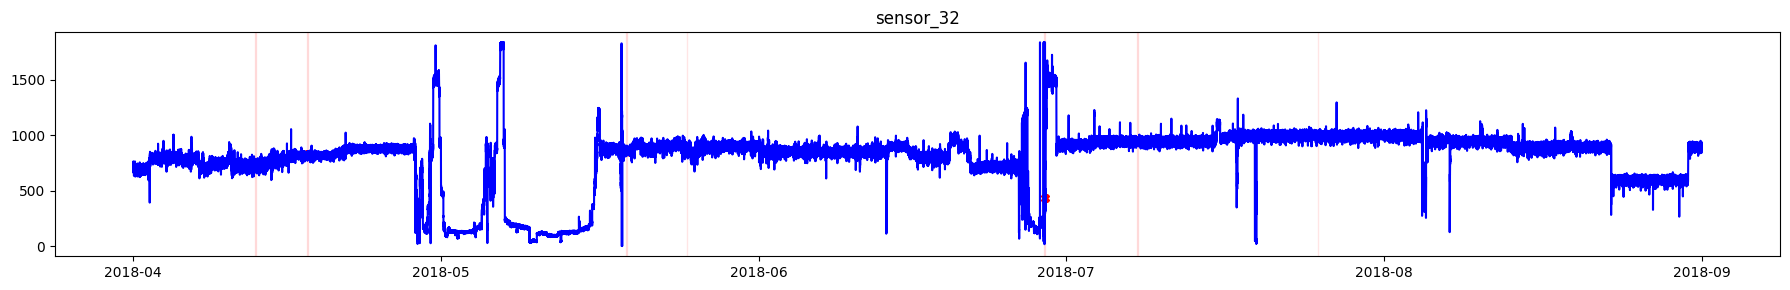

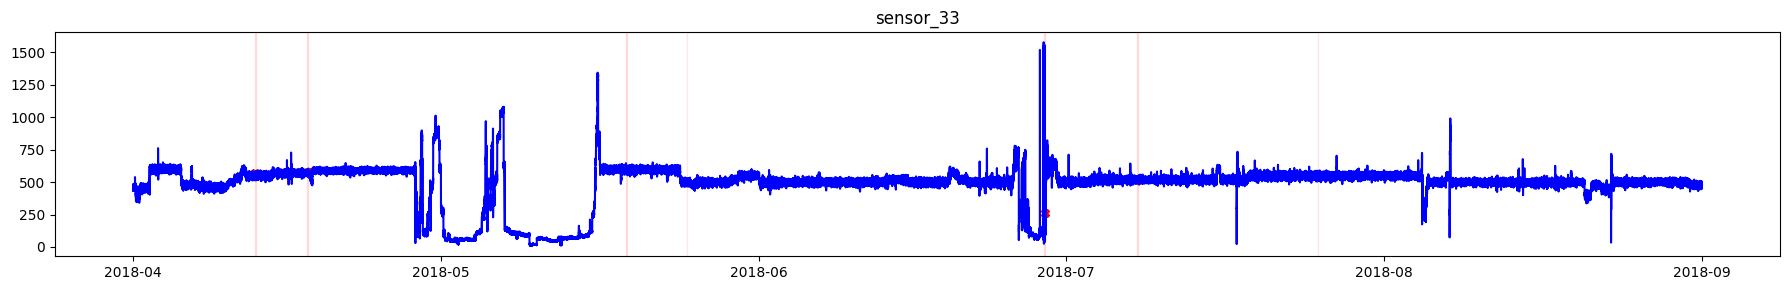

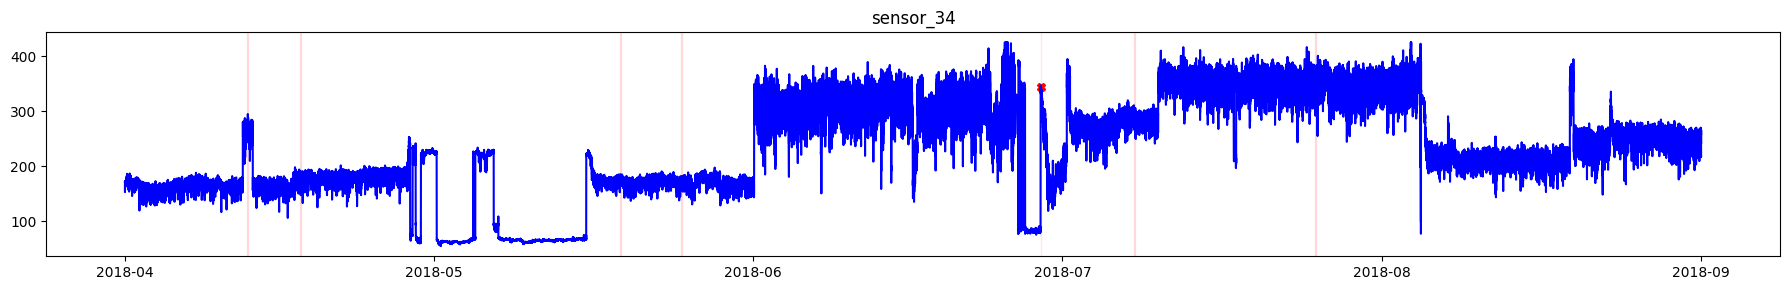

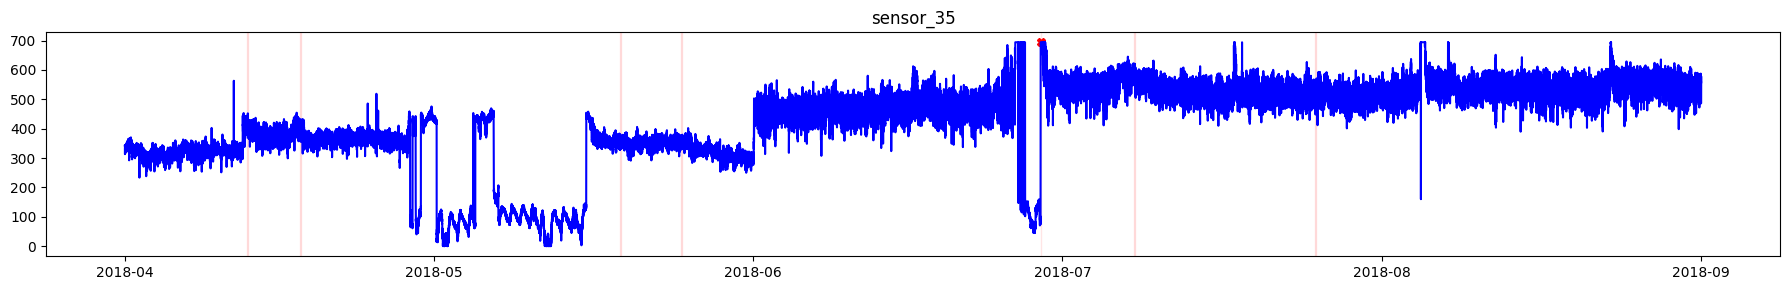

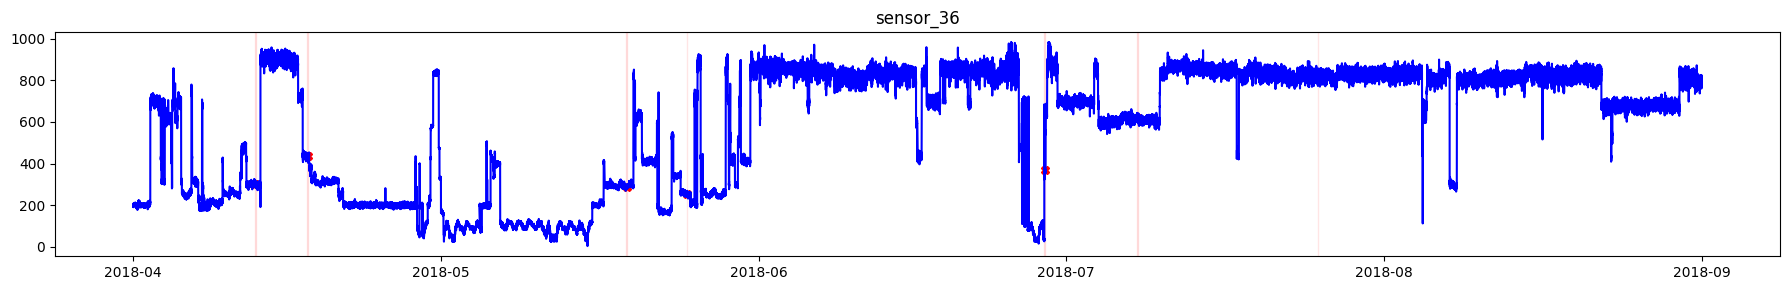

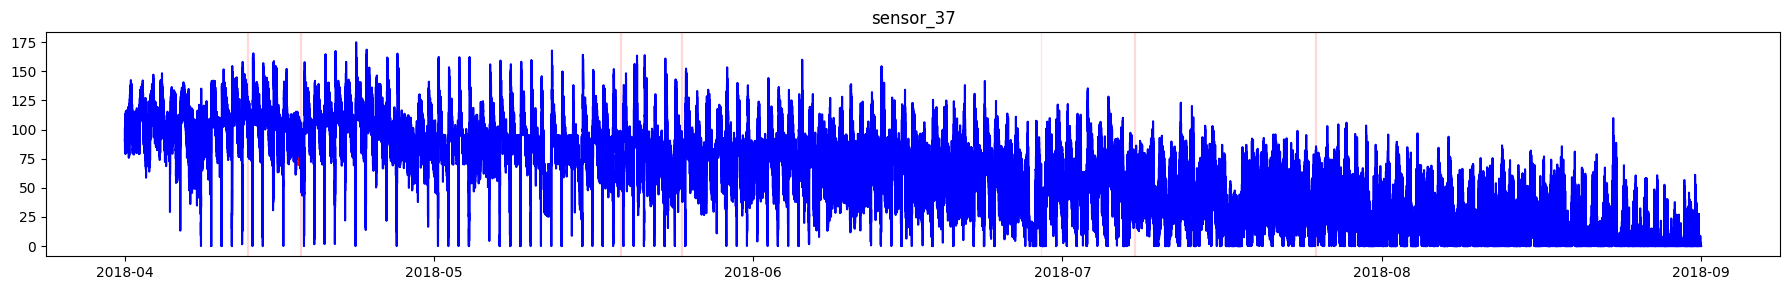

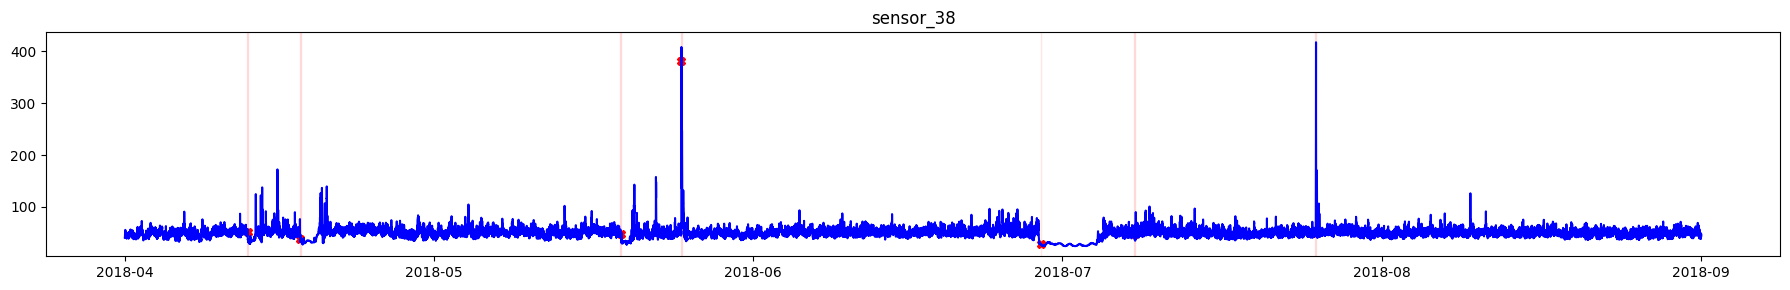

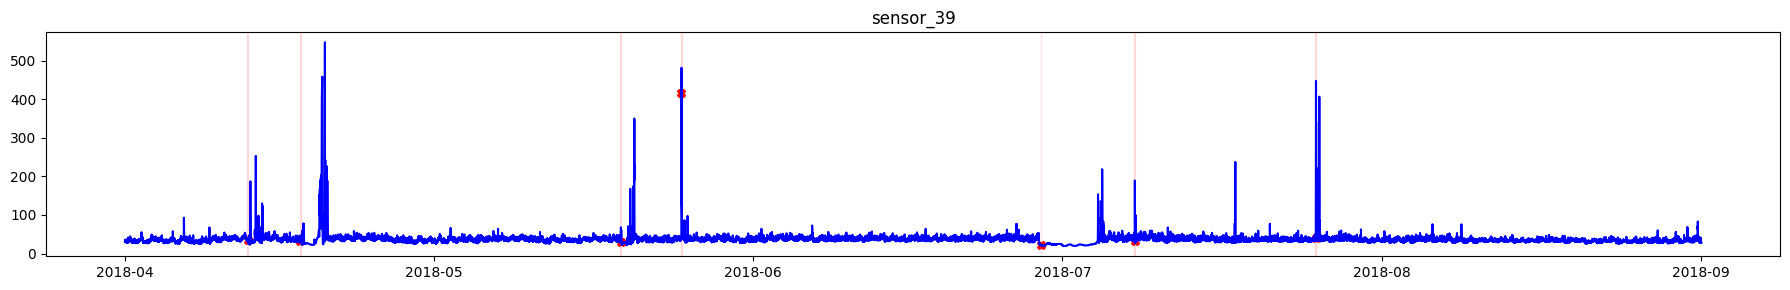

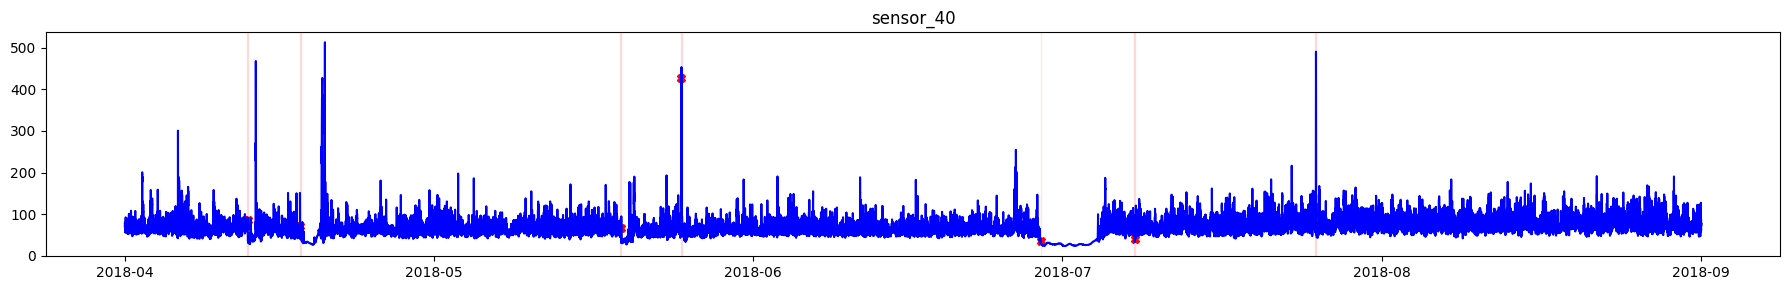

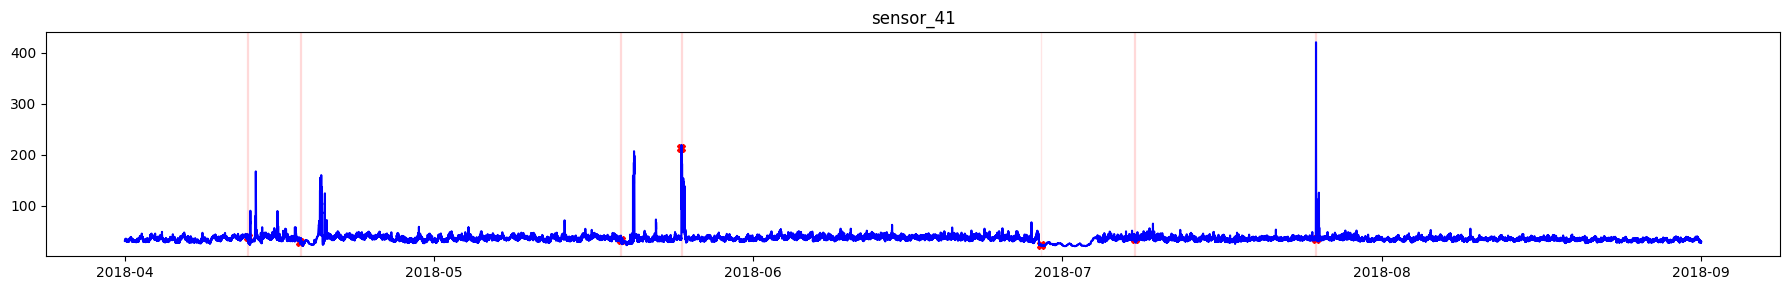

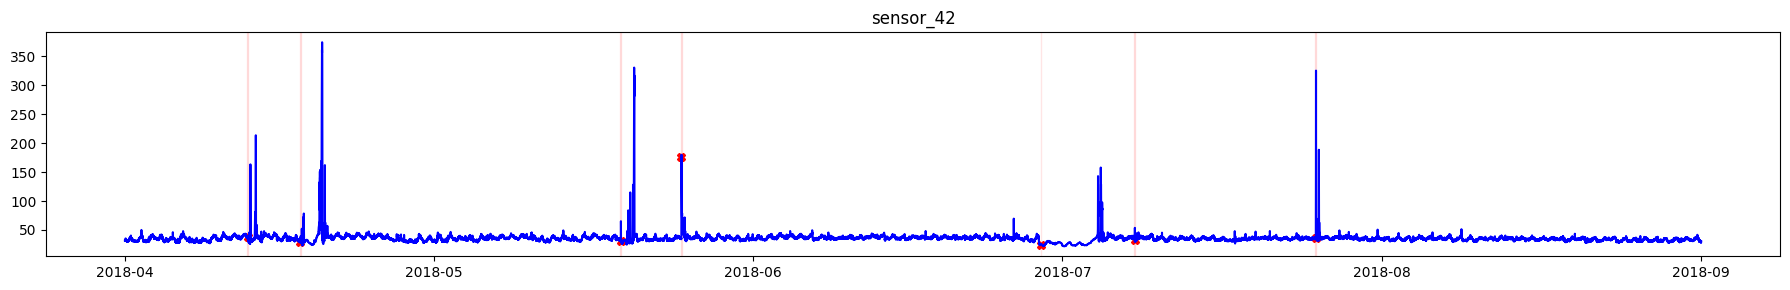

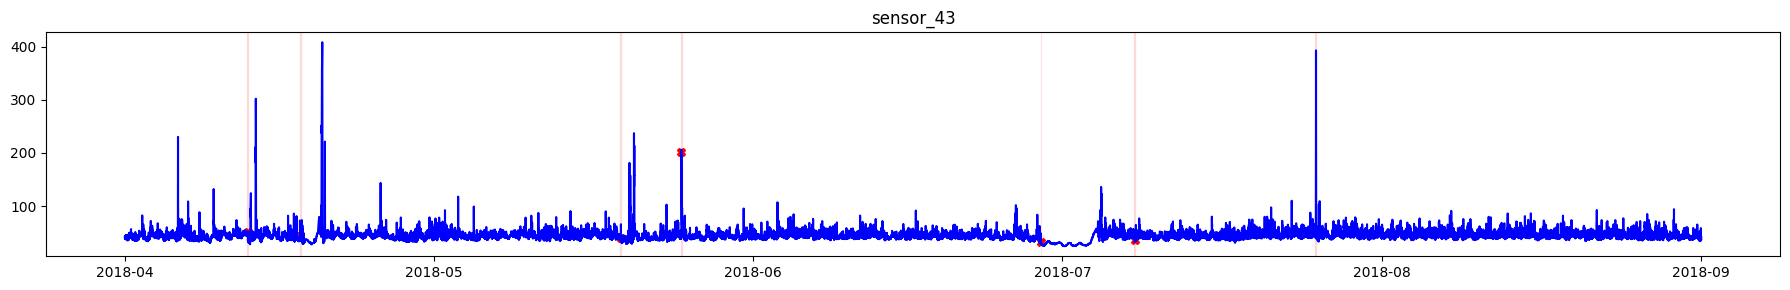

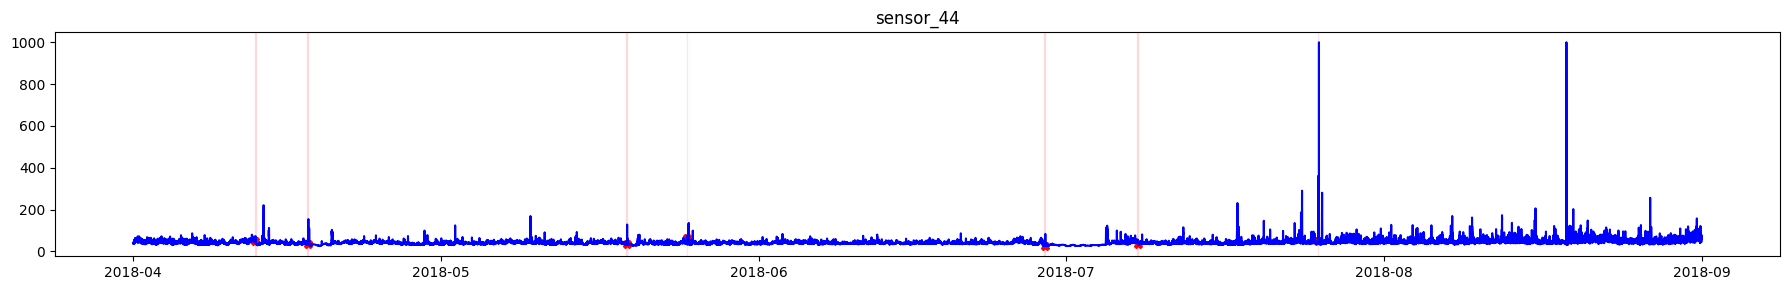

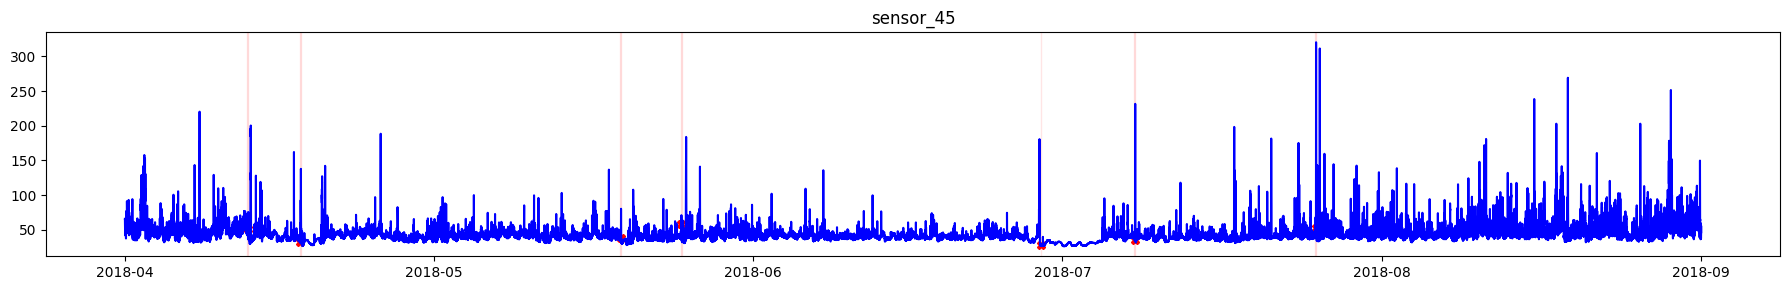

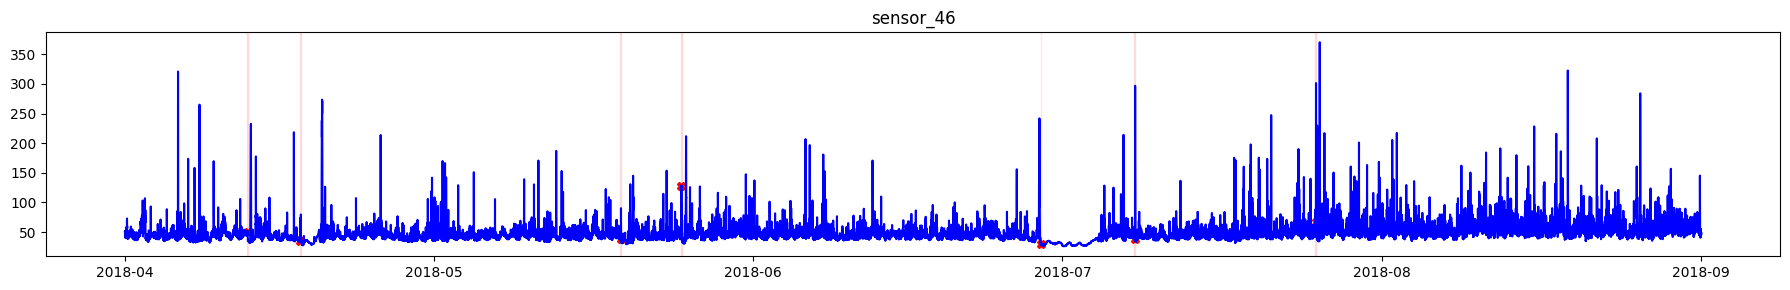

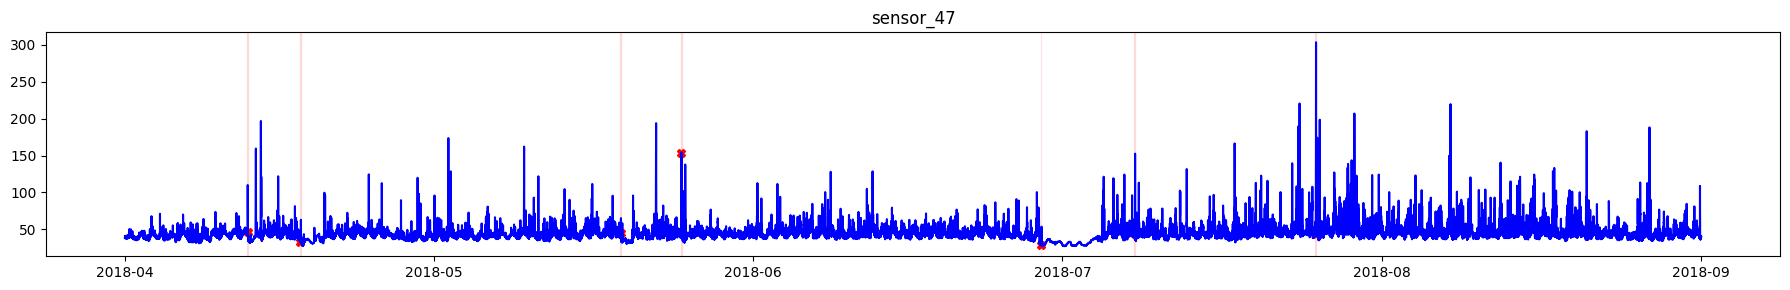

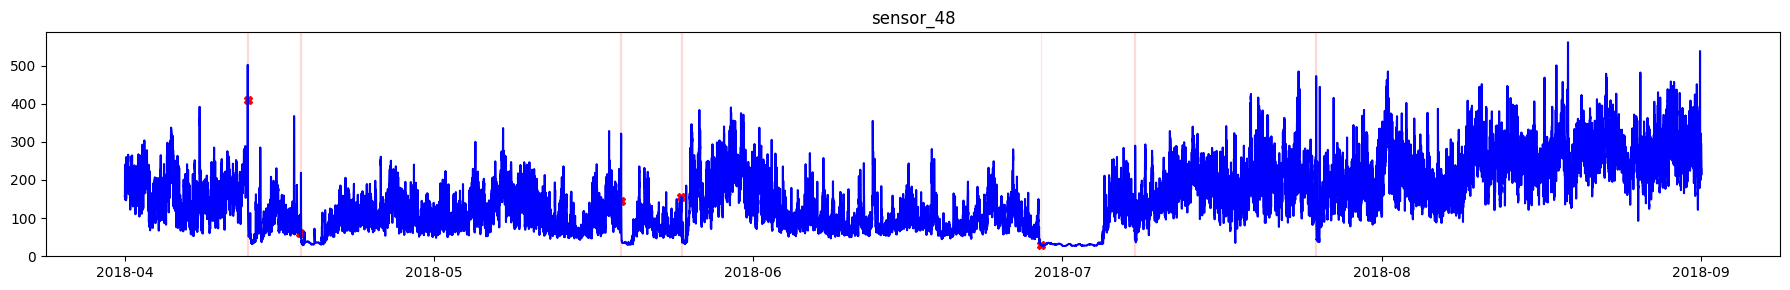

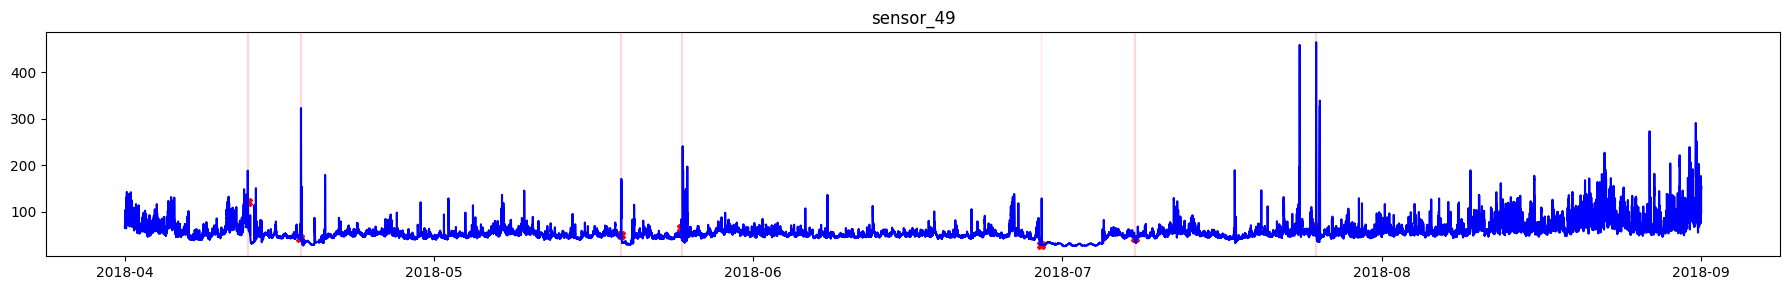

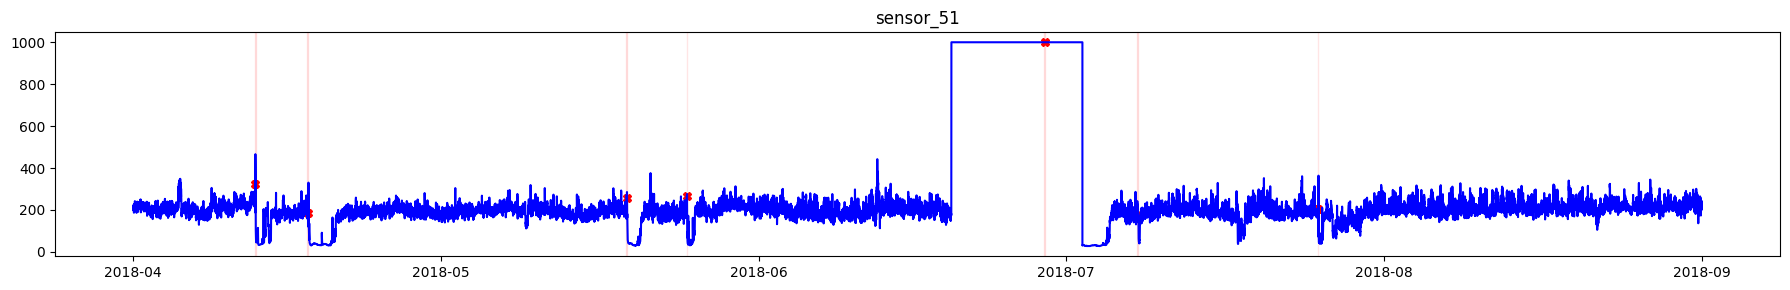

In [17]:
names=sensors.columns

for name in names:
    plt.figure(figsize=(18,3))
    plt.plot(broken[name],linestyle='none',marker='X',color='red')
    plt.plot(sensors[name],color='blue')
    
    for i in broken.index:
        plt.axvspan(i - pd.Timedelta(hours=1),i + pd.Timedelta(hours=1),color='red',alpha=0.1)
    plt.title(name)
    plt.tight_layout()
    plt.show()

The Blue line represents the sensor values over time.

The Red 'X' mark represents where each machine breaks down i.e (machine_status==BROKEN)

The Red shaded line represents 1 hour window when each machine breakdown occurs.

DATA STANDARDIZATION

In [18]:
scaler= StandardScaler()
scaled_data=scaler.fit_transform(sensors)
scaled_data=pd.DataFrame(scaled_data,columns=sensors.columns,index=sensors.index)
scaled_data.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,0.314712,-0.152986,0.639354,1.057648,0.303460,0.177150,0.069552,0.200794,0.234873,0.190017,...,-0.553936,-0.358937,-0.176765,-0.260475,1.759657,0.185929,-0.588581,0.086320,0.553107,-0.248495
2018-04-01 00:01:00,0.314712,-0.152986,0.639354,1.057648,0.303460,0.177150,0.069552,0.200794,0.234873,0.190017,...,-0.553936,-0.358937,-0.176765,-0.260475,1.759657,0.185929,-0.588581,0.086320,0.553107,-0.248495
2018-04-01 00:02:00,0.279421,-0.074132,0.639354,1.093535,0.334797,0.008734,0.039638,0.170969,0.251998,0.175335,...,-0.619878,-0.358937,-0.200346,-0.285471,1.737116,0.204429,-0.588581,0.061692,0.522877,-0.238382
2018-04-01 00:03:00,0.306308,-0.152986,0.627520,1.093534,0.260070,0.207740,0.037146,0.237509,0.278908,0.199807,...,-0.619878,-0.384321,-0.271086,-0.310467,1.692034,0.204429,-0.588581,0.061692,0.507762,-0.240911
2018-04-01 00:04:00,0.281102,-0.139845,0.639354,1.093534,0.317923,0.184619,0.049610,0.226036,0.278908,0.199807,...,-0.553936,-0.384321,-0.223925,-0.335463,1.714575,0.241429,-0.533159,0.089839,0.492648,-0.248495


CORRELATION BETWEEN THE SENSORS

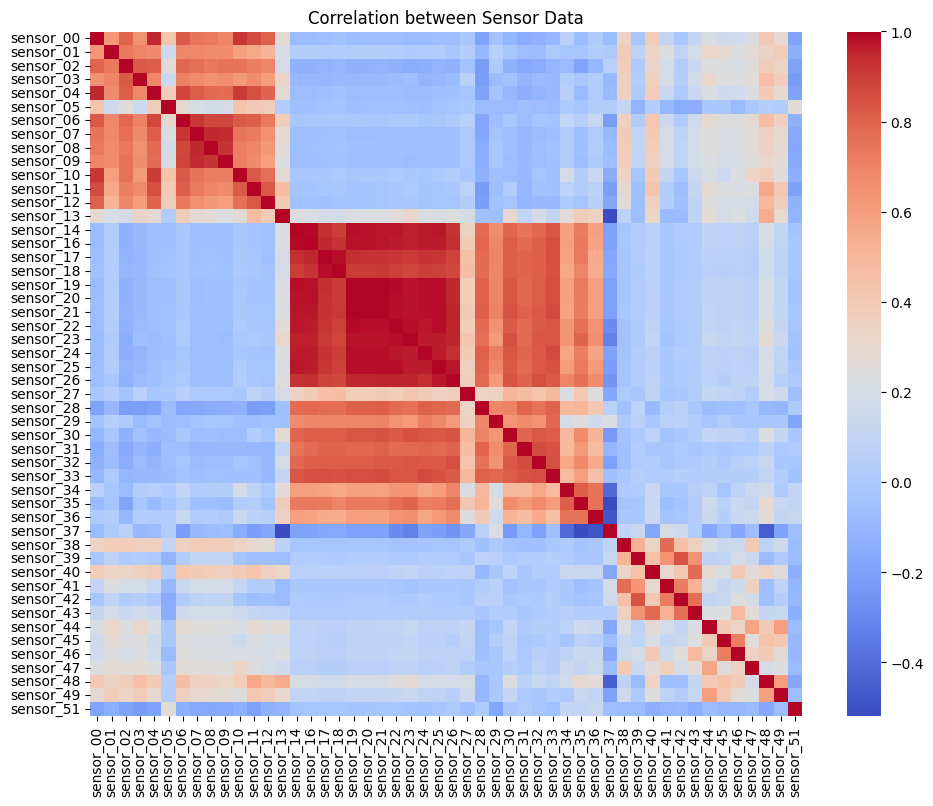

In [19]:
corr=scaled_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,xticklabels=sensors.columns,yticklabels=sensors.columns,cmap='coolwarm')
plt.tight_layout()
plt.title('Correlation between Sensor Data')
plt.show()

This correlation matrix between the sensors tells us:

- Sensors like sensor_14, sensor_17, sensor_19, sensor_21, sensor_23, sensor_25, sensor_26 show a strong positive correlation with each other
        
        this means that data present in these features may be redundant and all features may not be useful as they represent the same values.

- Sensors like sensor_00, sensor_05, sensor_13, sensor_27, sensor_39, sensor_47, sensor_49 show  low correlation.
        
        this means that data present in these features may be unique and may contain valuable information.

DIMENSIONALITY REDUCTION

In [20]:
pca=PCA(n_components=0.95)
pca_values=pca.fit_transform(scaled_data)
pca_column=['pca'+str(i+1) for i in range(pca.n_components_)]
sensor_pca=pd.DataFrame(pca_values,columns=pca_column)
sensor_pca.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22
0,0.019783,0.640881,-0.569364,0.690889,-2.271619,-0.237867,1.343000,-0.791653,-0.416362,-0.986244,...,0.036347,0.300317,0.052911,-0.084774,-0.062687,0.208548,-1.156160,-0.648659,-0.612058,-0.246440
1,0.019783,0.640881,-0.569364,0.690889,-2.271619,-0.237867,1.343000,-0.791653,-0.416362,-0.986244,...,0.036347,0.300317,0.052911,-0.084774,-0.062687,0.208548,-1.156160,-0.648659,-0.612058,-0.246440
2,0.159876,0.669923,-0.571484,0.778600,-2.393146,-0.296316,1.263719,-0.682867,-0.291158,-0.878103,...,0.152065,0.163901,-0.005548,-0.017482,-0.051946,0.169540,-1.034267,-0.638484,-0.703897,-0.176021
3,0.158612,0.692885,-0.582254,0.886745,-2.364425,-0.254187,1.372295,-0.539216,-0.198971,-0.773437,...,0.133711,0.210697,0.106605,-0.015640,-0.200713,0.289052,-1.111019,-0.645773,-0.682788,-0.088186
4,0.112191,0.798114,-0.461290,0.915269,-2.291975,-0.245276,1.444327,-0.743130,-0.466687,-0.836636,...,0.216919,0.107063,0.065977,-0.059445,-0.368952,0.244464,-1.118231,-0.551500,-0.636088,-0.125630


By setting the n_components as 0.95 to preserve 95% of all variance.

As a result, PCA gives us 22 components that capture 95% of the most important information.

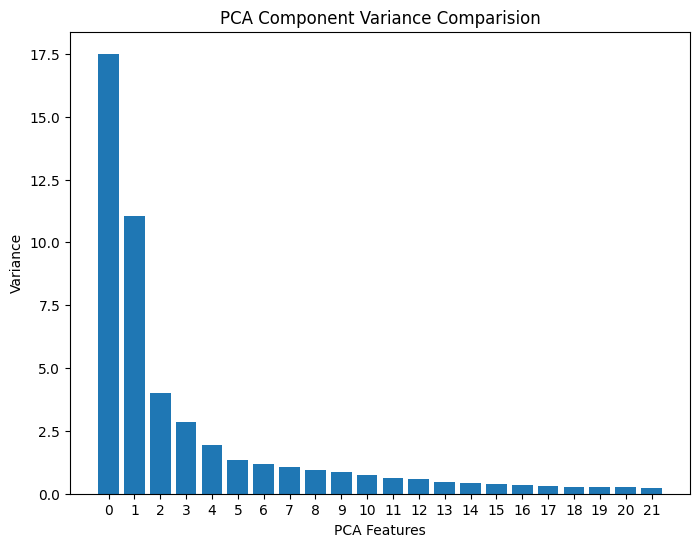

In [21]:
features=range(pca.n_components_)
plt.figure(figsize=(8,6))
plt.bar(features,pca.explained_variance_)
plt.xlabel('PCA Features')
plt.ylabel('Variance')
plt.xticks(features)
plt.title('PCA Component Variance Comparision')
plt.show()

This comparision bar graph tell us that PCA Components- PCA1 and PCA2 have the highest variance meaning they contain most of the relevant information.

All other components have relatively low variance and are not considered important features.

TEST FOR STATIONARITY

In [22]:
dftest=adfuller(sensor_pca['pca1'])
dfresult=dftest[1]
print(f'The p value is: {dfresult}')

The p value is: 0.00016600428316601736


Since p-value is 0.00016600428316601736 which is lower than 0.05, we reject the null hypothesis. Thus, PCA1 is stationary.

Similarly, we can perform ADF Test on other PCA components to test their stationarity.

GETTING CORRESPONDING SENSORS TO THE PCA COMPONENTS

In [23]:
corresponding_sensor=scaled_data.columns[np.abs(pca.components_).argmax(axis=1)]
feature_table = pd.DataFrame({'PCA': [f'pc{i+1}' for i in range(len(corresponding_sensor))],'Feature': corresponding_sensor})
feature_table

,PCA,Feature
0,pc1,sensor_21
1,pc2,sensor_06
2,pc3,sensor_42
3,pc4,sensor_37
4,pc5,sensor_34
5,pc6,sensor_47
6,pc7,sensor_05
7,pc8,sensor_27
8,pc9,sensor_27
9,pc10,sensor_47


PLOTTING PCA COMPONETS TO ANALYZE THEIR TRENDS

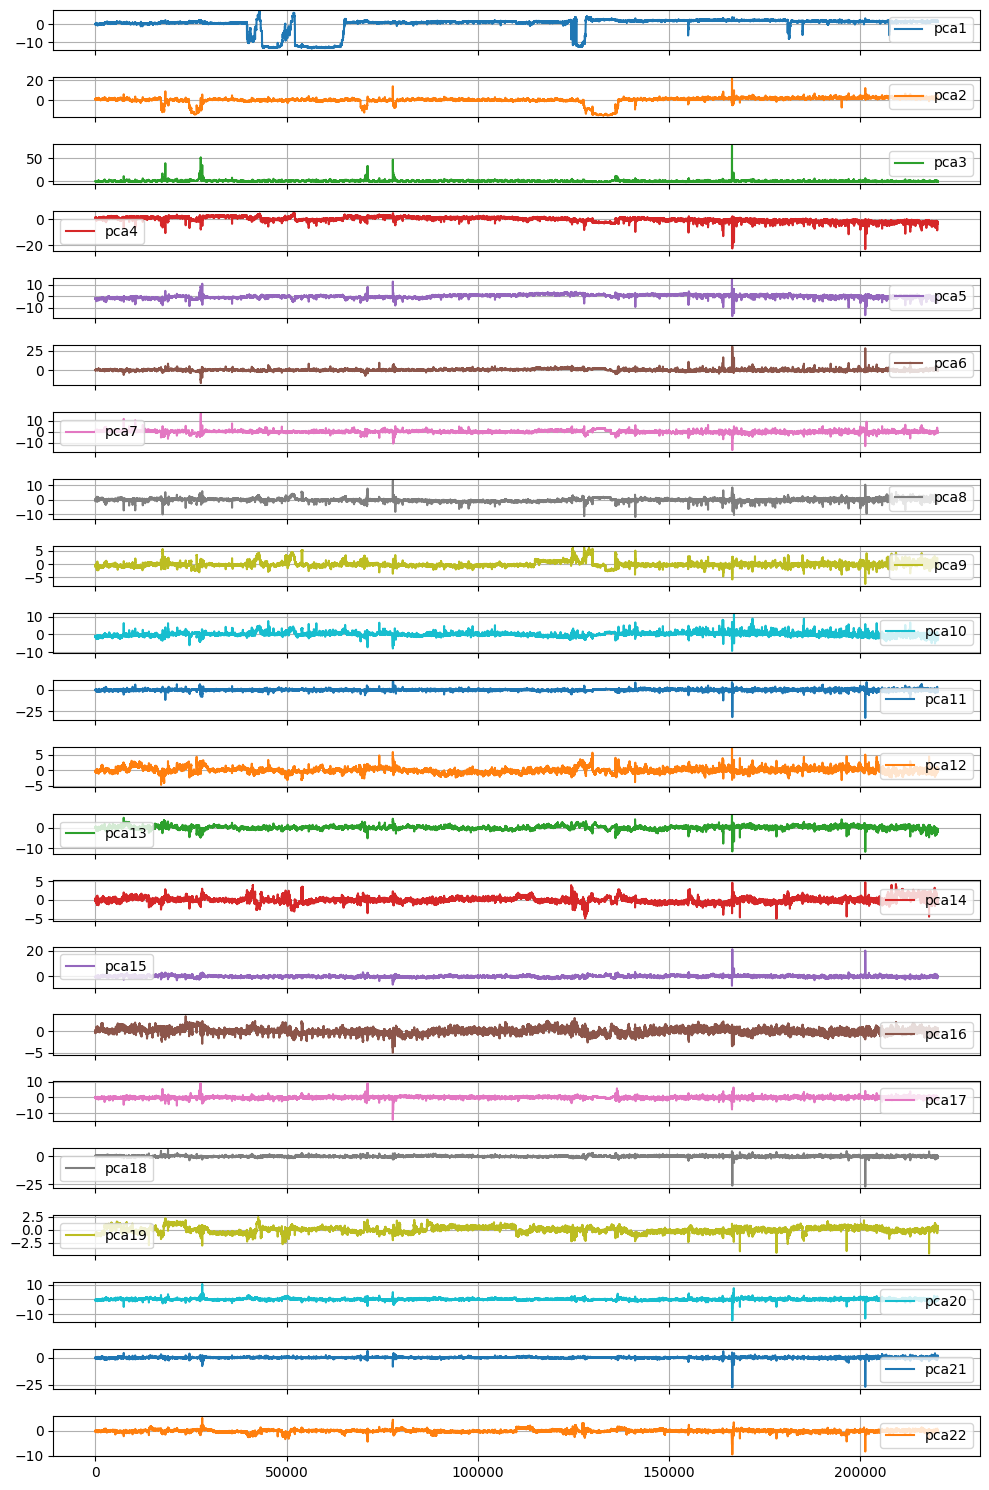

In [24]:
sensor_pca.plot(subplots=True,figsize=(10,15),grid=True)
plt.tight_layout()
plt.show()

PCA Components- PCA1, PCA2, PCA3 show clear patterns which make them suitable for anomaly detection.

While components like PCA12, PCA13, PCA14 show noise and no distinct trend can be visible making them less suitable for detecting anomalies

PERFORMING PCA AGAIN TO GET BEST PCA COMPONENTS

In [25]:
pca=PCA(n_components=2)
best_sensors=pca.fit_transform(scaled_data)
best_sensors=pd.DataFrame(best_sensors,columns=['PCA1','PCA2'],index=scaled_data.index)
best_sensors.head()

,PCA1,PCA2
timestamp,,
2018-04-01 00:00:00,0.019783,0.640881
2018-04-01 00:01:00,0.019783,0.640881
2018-04-01 00:02:00,0.159876,0.669923
2018-04-01 00:03:00,0.158612,0.692885
2018-04-01 00:04:00,0.112191,0.798114


MODEL BUILDING

K-Means Clustering

In [26]:
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(best_sensors)
labels=kmeans.predict(best_sensors)

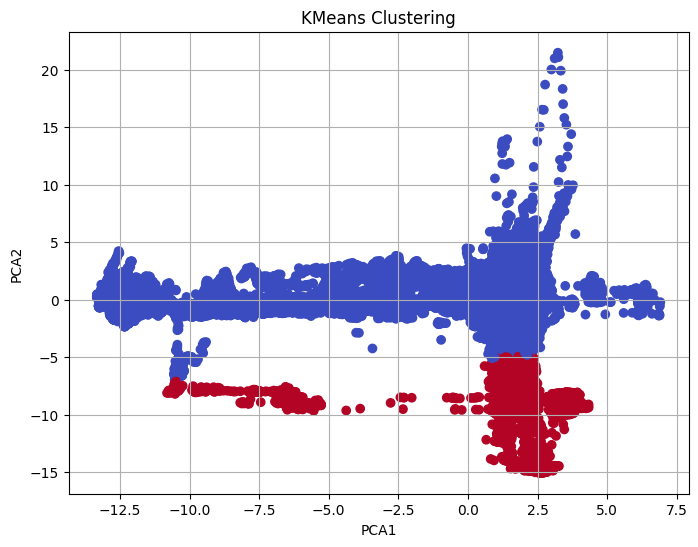

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(best_sensors['PCA1'], best_sensors['PCA2'], c=labels, cmap='coolwarm')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('KMeans Clustering')
plt.grid(True)
plt.show()

On comparing PCA1 and PCA2 we can observe distinct clusters being formed, some of the more scattered points could indicate potential anomalies.

DISTANCE TO CLUSTER CENTER

In [28]:
def getDistanceByPoint(data, model):
    distances = []
    for i in range(len(data)):
        Xa = np.array(data.iloc[i])
        Xb = model.cluster_centers_[model.labels_[i] - 1]
        distances.append(np.linalg.norm(Xa - Xb))
    return pd.Series(distances, index=data.index)

SETTING THRESHOLD VALUE

In [29]:
outliers_fraction = 0.13
distance = getDistanceByPoint(best_sensors, kmeans)
best_sensors['Distance'] = distance 
n_outliers = int(outliers_fraction * len(distance))
threshold = distance.nlargest(n_outliers).min()
best_sensors['kmeans_anomaly'] = (distance >= threshold).astype(int)

VISUALISING THE ANOMALIES

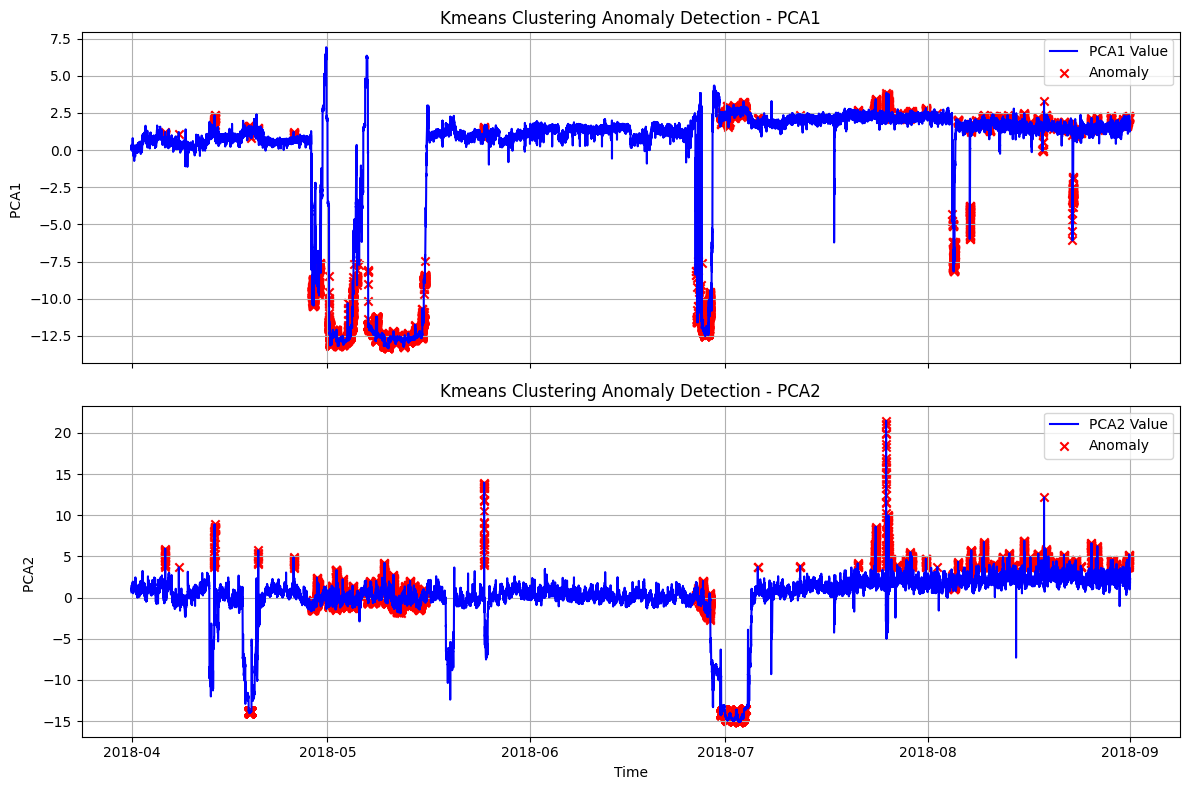

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# PCA1
ax1.plot(best_sensors.index, best_sensors['PCA1'], label='PCA1 Value', color='blue')
ax1.scatter(best_sensors.index[best_sensors['kmeans_anomaly'] == 1],
            best_sensors['PCA1'][best_sensors['kmeans_anomaly'] == 1],
            color='red', marker='x', label='Anomaly')
ax1.set_title("Kmeans Clustering Anomaly Detection - PCA1")
ax1.set_ylabel("PCA1 ")
ax1.legend()
ax1.grid(True)

# PCA2
ax2.plot(best_sensors.index, best_sensors['PCA2'], label='PCA2 Value', color='blue')
ax2.scatter(best_sensors.index[best_sensors['kmeans_anomaly'] == 1],
            best_sensors['PCA2'][best_sensors['kmeans_anomaly'] == 1],
            color='red', marker='x', label='Anomaly')
ax2.set_title("Kmeans Clustering Anomaly Detection - PCA2")
ax2.set_xlabel("Time")
ax2.set_ylabel("PCA2 ")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

The plot shows two subplots showing Kmeans Clustering anomaly detection results for the first two principal components (PCA1 and PCA2) over time.

For PCA1:
- There are clear anomaly clusters during mid-to-late April and late June to early July, matching periods where PCA1 values have sharp positive and negative swings. Few isolated anomalies are detected during August.

For PCA2:

- Noticeable anomaly clusters appear in late April, early May, and late June to mid-July, where PCA2 values drop sharply or spike upwards.

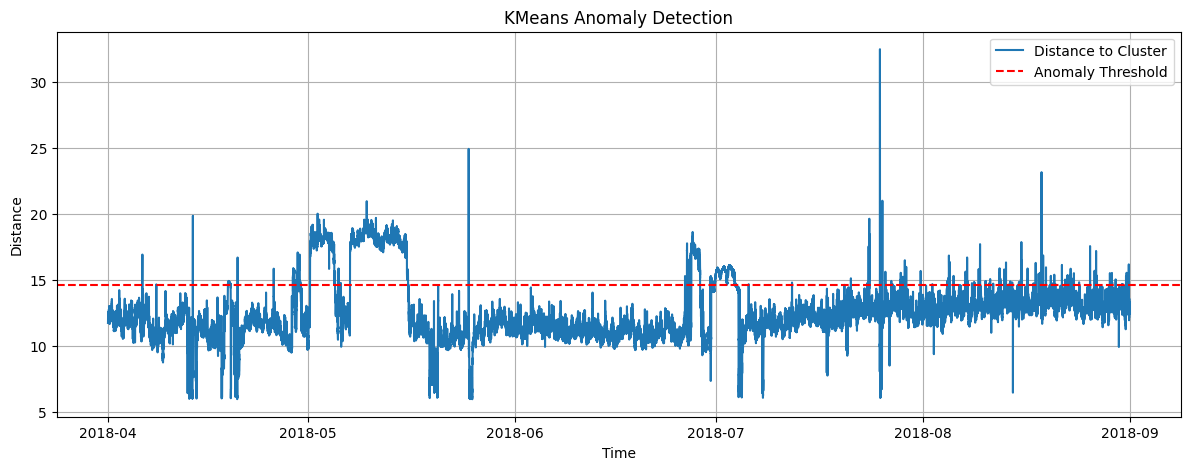

In [31]:
plt.figure(figsize=(14.5, 5))
plt.plot(best_sensors['Distance'], label='Distance to Cluster')
plt.axhline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.title("KMeans Anomaly Detection")
plt.xlabel("Time")
plt.ylabel("Distance")
plt.legend()
plt.grid(True)
plt.show()

Data lying above the anomaly threshold are marked as anomalies.

It can be observed that distance from clusters rate incresases around late April, mid-May, late June, and early August causing great spikes above the anomaly threshold which confirm the presence of greater anomalies during this time.

MODEL EVALUATION AND ACCURACY

In [32]:
y_true = pump['machine_status'].map({"NORMAL": 0, "RECOVERING": 1, "BROKEN": 1}).values

Create a mapping from machine status labels to numeric values
- NORMAL: 0 (considered healthy / non-anomalous)
- RECOVERING: 1 (considered anomalous)
- BROKEN: 1 (considered anomalous)

In [33]:
kmeans_pred = best_sensors['kmeans_anomaly'].values
print(classification_report(y_true, kmeans_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92    205836
           1       0.19      0.38      0.26     14484

    accuracy                           0.85    220320
   macro avg       0.57      0.64      0.59    220320
weighted avg       0.90      0.85      0.88    220320



The Classification Report tells us that:

FOR CLASS 0 (MACHINE STATUS==NORMAL)
- Precision is 0.95 meaning of all data points predicted as NORMAL 95% of them were actually NORMAL
- Recall is 0.89 meaning 89% of NORMAL instances were correctly identified as NORMAL
- F1 Score ie 0.92 gives us the mean of Precision and Recall score meaning the model does well in predicting NORMAL instances
- Support is 205836 meaning there were 205836 instances of NORMAL machine status

FOR CLASS 1 (MACHINE STATUS==RECOVERING && MACHINE STATUS==BROKEN) ie ANOMALOUS
- Precision is 0.19 meaning of all data points predicted as ANOMALOUS 19% of them were actually ANOMALOUS
- Recall is 0.38 meaning 38% of all ANOMALOUS instances were correctly identified as ANOMALOUS
- F1 Score is 0.26 gives us the mean of Precision and Recall score meaning the model is not good at identifying ANOMALIES
- Support if 14484 meaning there were 14484 instances of RECOVERING AND BROKEN machine status

The Accuracy is 85% which is high however the model is not very good at identifying ANOMALIES.

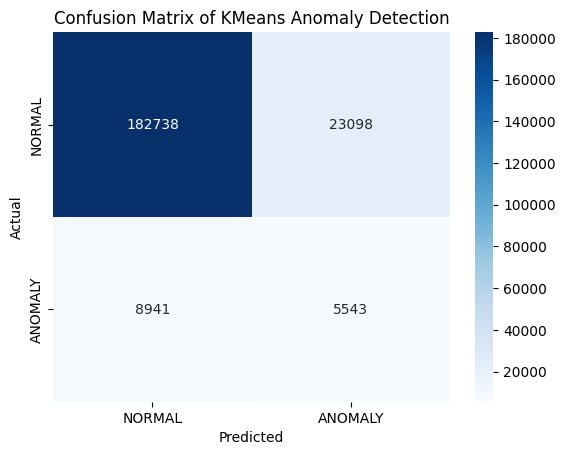

In [34]:
cm = confusion_matrix(y_true, kmeans_pred)
cm_labels = ['NORMAL', 'ANOMALY']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)

plt.title("Confusion Matrix of KMeans Anomaly Detection")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Confusion Matrix tells us that:

- TN = 182738: The model correctly predicts 182738 values as NORMAL status when it actually was NORMAL.
- FP = 23098: The model wrongly predicted 23098 values as ANOMALY when it actually was NORMAL.
- FN = 8941: The model wrongly predicts 8941 values as NORMAL when it actually was ANOMALOUS.
- TP = 5543: The model correctly predicts 5543 values as ANOMALOUS values when it actually was ANOMALOUS.

Isolation Forest

In [35]:
iso = IsolationForest(contamination=0.15, random_state=42)
iso.fit(best_sensors[['PCA1', 'PCA2']])
iso_pred = iso.predict(best_sensors[['PCA1', 'PCA2']])
iso_pred = [1 if p == -1 else 0 for p in iso_pred]
best_sensors['iso_anomaly'] = iso_pred

VISUALISING THE ANOMALIES

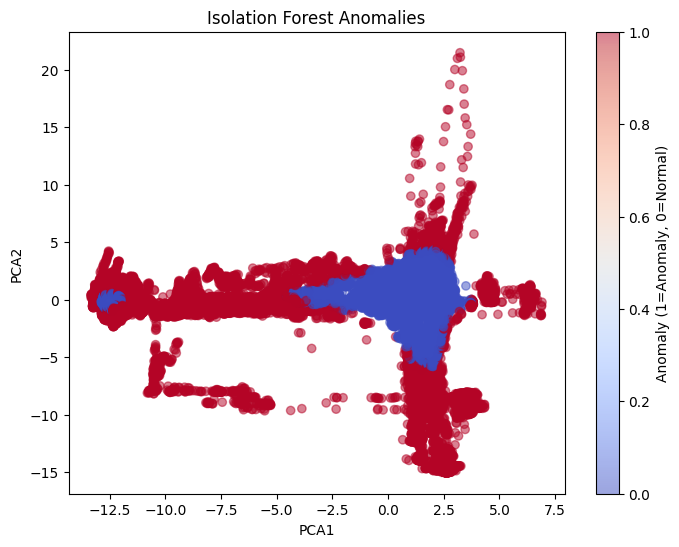

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(best_sensors['PCA1'], best_sensors['PCA2'], c=iso_pred, cmap='coolwarm',alpha=0.5)
plt.title("Isolation Forest Anomalies")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Anomaly (1=Anomaly, 0=Normal)")
plt.show()

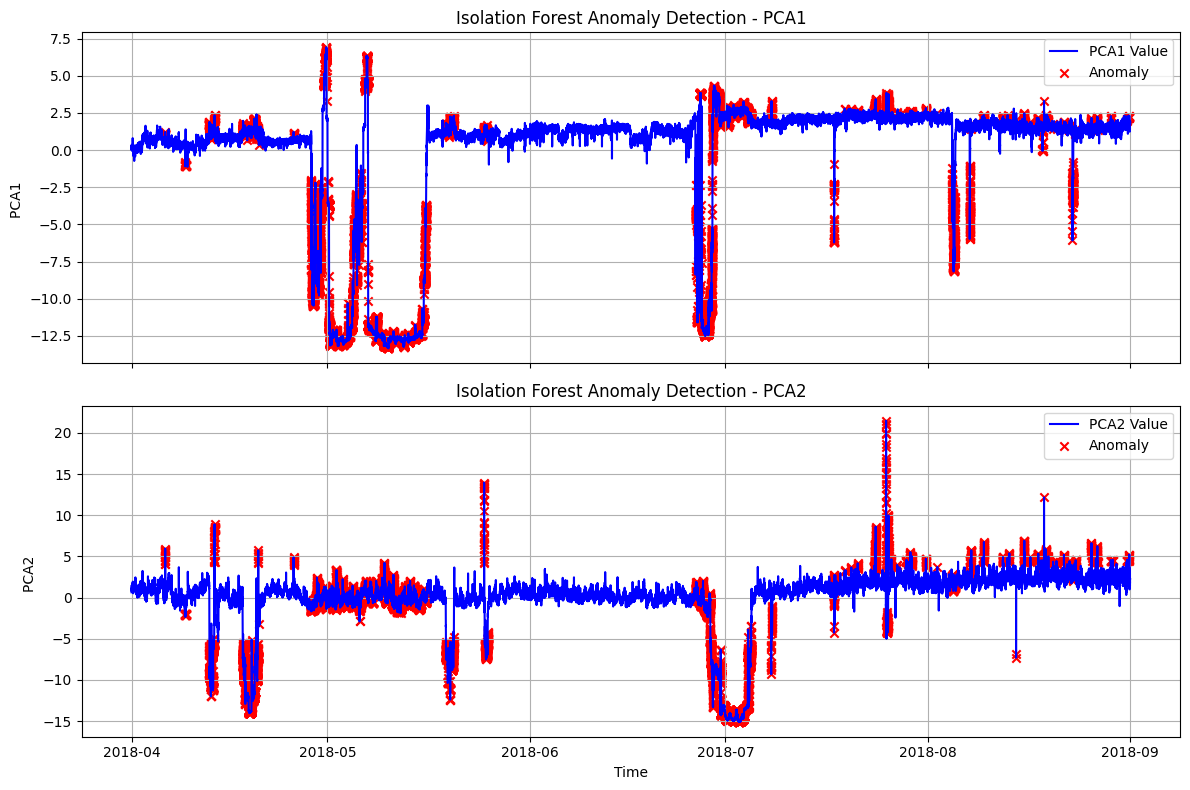

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# PCA1
ax1.plot(best_sensors.index, best_sensors['PCA1'], label='PCA1 Value', color='blue')
ax1.scatter(best_sensors.index[best_sensors['iso_anomaly'] == 1],
            best_sensors['PCA1'][best_sensors['iso_anomaly'] == 1],
            color='red', marker='x', label='Anomaly')
ax1.set_title("Isolation Forest Anomaly Detection - PCA1")
ax1.set_ylabel("PCA1 ")
ax1.legend()
ax1.grid(True)

# PCA2
ax2.plot(best_sensors.index, best_sensors['PCA2'], label='PCA2 Value', color='blue')
ax2.scatter(best_sensors.index[best_sensors['iso_anomaly'] == 1],
            best_sensors['PCA2'][best_sensors['iso_anomaly'] == 1],
            color='red', marker='x', label='Anomaly')
ax2.set_title("Isolation Forest Anomaly Detection - PCA2")
ax2.set_xlabel("Time")
ax2.set_ylabel("PCA2 ")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

The plot shows two subplots showing Isolation Forest anomaly detection results for the first two principal components (PCA1 and PCA2) over time.

For PCA1:
- Large anomaly clusters occur in mid-to-late April and again in late June to early July, where PCA1 values deviate both positively and negatively.

For PCA2:
- Significant anomalies appear in late April, late June, and mid-July, with some extreme spikes in both directions.

MODEL EVALUATION AND ACCURACY

In [38]:
print(classification_report(y_true, iso_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    205836
           1       0.41      0.95      0.58     14484

    accuracy                           0.91    220320
   macro avg       0.71      0.93      0.76    220320
weighted avg       0.96      0.91      0.92    220320



The Classification Report tells us that:

FOR CLASS 0 (MACHINE STATUS==NORMAL)
- Precision is 1 meaning of all data points predicted as NORMAL 100% of them were actually NORMAL
- Recall is 0.91 meaning 91% of NORMAL instances were correctly identified as NORMAL
- F1 Score ie 0.95 gives us the mean of Precision and Recall score meaning the model does well in predicting NORMAL instances
- Support is 205836 meaning there were 205836 instances of NORMAL machine status

FOR CLASS 1 (MACHINE STATUS==RECOVERING && MACHINE STATUS==BROKEN) ie ANOMALOUS
- Precision is 0.41 meaning of all data points predicted as ANOMALOUS 41% of them were actually ANOMALOUS
- Recall is 0.95 meaning 95% of all ANOMALOUS instances were correctly identified as ANOMALOUS
- F1 Score is 0.58 gives us the mean of Precision and Recall score meaning the model is average at identifying ANOMALIES
- Support if 14484 meaning there were 14484 instances of RECOVERING AND BROKEN machine status

The Accuracy is 91% which means Isolation Forest has greatly improved anomaly recall however precision is still how meaning there are many false positives.

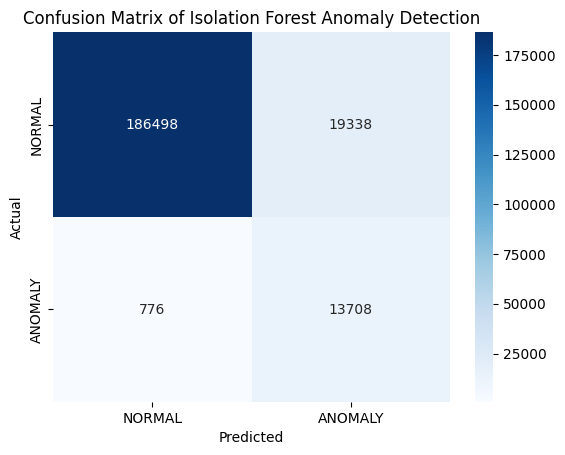

In [39]:
cm = confusion_matrix(y_true, iso_pred)
cm_labels = ['NORMAL', 'ANOMALY']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)

plt.title("Confusion Matrix of Isolation Forest Anomaly Detection")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Confusion Matrix tells us that:

- TN = 186498: The model correctly predicts 186498 values as NORMAL status when it actually was NORMAL.
- FP = 19338: The model wrongly predicted 19338 values as ANOMALY when it actually was NORMAL.
- FN = 776: The model wrongly predicts 776 values as NORMAL when it actually was ANOMALOUS.
- TP = 13708: The model correctly predicts 13708 values as ANOMALOUS values when it actually was ANOMALOUS.

MODEL PERFORMANCE

ROC Curve Comparision tells us about how the True Positive Rate and False Positive Rate change at different thresholds.

AUC Curve gives us Area under Curve score to summarize performance the higher the better.

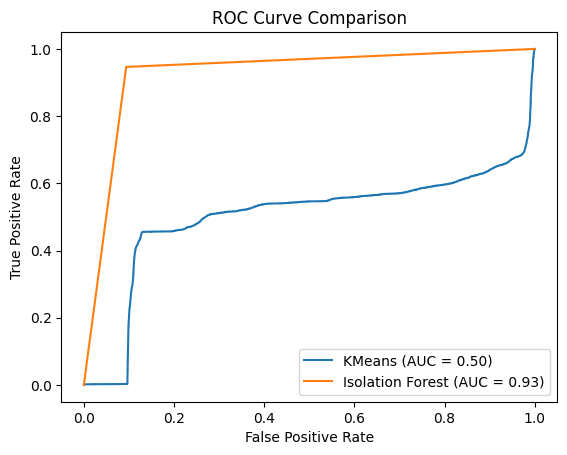

In [40]:
# Get False Positive Rate (fpr) and True Positive Rate (tpr) for KMeans
fpr_k, tpr_k, _ = roc_curve(y_true, best_sensors['Distance'])
# Get False Positive Rate (fpr) and True Positive Rate (tpr) for Isolation Forest
fpr_i, tpr_i, _ = roc_curve(y_true, best_sensors['iso_anomaly'])

plt.plot(fpr_k, tpr_k, label='KMeans (AUC = %.2f)' % auc(fpr_k, tpr_k))
plt.plot(fpr_i, tpr_i, label='Isolation Forest (AUC = %.2f)' % auc(fpr_i, tpr_i))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

For Kmeans:
- AUC of 0.50 means the model has no real ability to distinguish between anomalies and normal points.
- Low True Positive Rate with relatively High False Positive Rate.

For Isolation Forest:
- AUC of 0.93 means excellent discrimination — the model can clearly tell anomalies from normal data.
- High True Positive Rate with relatively low False Positive Rate.

CONCLUSION

Isolation Forest may have lower precision, but for time series it avoids data leakage from future values, can detect novel anomalies unseen in training, and prioritizes catching rare faults over reducing false alarms.

This makes it safer and more realistic for real-time anomaly detection compared to supervised models with random splits.

Isolation Forest is much better suited for anomaly detection in this dataset than KMeans.